<a href="https://colab.research.google.com/github/Sameterenalemdar/introduction-to-machine-learning/blob/main/FERM526_Samet_Eren_Alemdar_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FERM 526 PROJECT**


SAMET EREN ALEMDAR



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving data.xlsx to data.xlsx


In [ ]:
df = pd.read_excel("data.xlsx", sheet_name="Sheet1")
df.set_index("Date", inplace=True)
df

,SPX Index,XAUUSD Curncy,NYFYPROB Index,USGG10YR Index,USGG3M Index,US BOND,Spread_x,Shiller PE,VIG,VUG,NBER Recession Flag
Date,,,,,,,,,,,
1965-01-31,87.56,35.12,0.236821,4.1920,3.8700,NaN,0.3220,23.269335,NaN,NaN,0
1965-02-28,87.43,35.12,0.257626,4.2220,3.9900,NaN,0.2320,23.372068,NaN,NaN,0
1965-03-31,86.16,35.12,0.257626,4.2020,3.9300,NaN,0.2720,23.253528,NaN,NaN,0
1965-04-30,89.11,35.12,0.259674,4.2120,3.9100,NaN,0.3020,23.420552,NaN,NaN,0
1965-05-31,88.42,35.12,0.249245,4.2320,3.8700,NaN,0.3620,23.708808,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,6032.38,2643.15,0.335634,4.1685,4.4858,2326.08,-0.3173,37.350196,202.793991,408.073669,0
2024-12-31,5881.63,2624.50,0.293972,4.5690,4.3144,2290.24,0.2546,37.711192,194.890808,409.904205,0
2025-01-31,6040.53,2798.41,0.231754,4.5387,4.2839,2302.09,0.2548,37.129220,201.250168,417.803894,0


In [ ]:
cols = ["SPX Index", "Spread_x", "Shiller PE", "VIG", "VUG", "NYFYPROB Index","XAUUSD Curncy","USGG10YR Index","USGG3M Index","US BOND","NBER Recession Flag"]

df_selected = df[cols].copy()

df_selected["SPX_Return"] = np.log(df_selected["SPX Index"] / df_selected["SPX Index"].shift(1))

df_selected["dSpread"] = df_selected["Spread_x"].diff()
df_selected["dShiller"] = df_selected["Shiller PE"].diff()

df_clean = df_selected[["SPX_Return", "dSpread", "dShiller", "VIG", "VUG","NYFYPROB Index","XAUUSD Curncy","USGG10YR Index","USGG3M Index","US BOND","NBER Recession Flag"]].dropna()

### Overview of VIG and VUG Exchange-Traded Funds (ETFs)

* **VIG (Vanguard Dividend Appreciation ETF)** primarily targets U.S.-based companies known for consistently increasing their dividends over extended periods. The fund predominantly invests in large-cap, financially stable corporations demonstrating robust profitability, reliable cash flow, and a long-standing history of rewarding shareholders with steady dividend growth.

* **VUG (Vanguard Growth ETF)** aims to replicate the performance of the CRSP U.S. Large Cap Growth Index. This ETF primarily selects stocks with significant growth potential, particularly from innovative sectors like technology, consumer discretionary, and healthcare, emphasizing companies expected to generate high earnings growth and increased market share.

### Investment Strategy Comparison: Dividend-Based vs. Growth-Based Approaches

* **Dividend-based strategies (e.g., VIG)** emphasize regular dividend payments, stability, and gradual growth in dividends. Investors seeking consistent income streams and reduced investment volatility often prefer these approaches. They typically yield moderate returns but offer predictability and resilience, especially during market downturns.

* **Growth-based strategies (e.g., VUG)** focus on capital appreciation through investments in companies poised to expand revenues and earnings rapidly. Investors adopting this strategy accept higher volatility and risk levels for the potential of significantly higher returns. These strategies tend to perform exceptionally well during bullish market conditions but can face heightened sensitivity during market corrections.

### Historical Performance and Risk Analysis

To provide a thorough understanding, historical performances of these two ETFs are examined based on monthly logarithmic returns and volatility. This analysis illustrates the comparative risk-return dynamics of both investment styles over the available historical period.

Such a detailed comparison aids investors in aligning their ETF choices with their individual financial objectives, risk tolerances, and income requirements.


In [ ]:
import numpy as np
import pandas as pd

df_clean["VIG_Return"] = np.log(df_clean["VIG"] / df_clean["VIG"].shift(1))
df_clean["VUG_Return"] = np.log(df_clean["VUG"] / df_clean["VUG"].shift(1))

vig_perf = {
    "Mean Monthly Return": df_clean["VIG_Return"].mean(),
    "Annualized Return": (1 + df_clean["VIG_Return"].mean())**12 - 1,
    "Volatility (Annualized)": df_clean["VIG_Return"].std() * np.sqrt(12)
}

vug_perf = {
    "Mean Monthly Return": df_clean["VUG_Return"].mean(),
    "Annualized Return": (1 + df_clean["VUG_Return"].mean())**12 - 1,
    "Volatility (Annualized)": df_clean["VUG_Return"].std() * np.sqrt(12)
}

perf_table = pd.DataFrame([vig_perf, vug_perf], index=["VIG", "VUG"])
perf_table.style.format("{:.2%}")


,Mean Monthly Return,Annualized Return,Volatility (Annualized)
VIG,0.77%,9.70%,13.60%
VUG,0.95%,11.99%,17.15%


### Return Analysis

* **Mean Monthly Return**:

  * **VUG** shows a superior mean monthly return of **0.95%**, indicating robust short-term growth, which aligns with its primary investment focus on growth-oriented companies exhibiting significant earnings growth and market expansion potential.
  * **VIG**, on the other hand, registers a more modest mean monthly return of **0.77%**, reflecting its conservative nature by focusing on high-quality, dividend-paying companies with consistent but gradual growth trajectories.

* **Annualized Return**:

  * The trend remains consistent with monthly returns. **VUG** significantly outperforms with an annualized return of **11.99%**, clearly evidencing strong long-term growth performance tied to growth-driven companies and sectors such as technology and consumer discretionary.
  * **VIG** achieves an annualized return of **9.70%**, representing steady, lower-risk appreciation typically associated with dividend-focused, financially stable, mature companies.

### Volatility

* **Annualized Volatility**:

  * The volatility metrics underscore the inherent risk-reward trade-off. **VUG** has a higher annualized volatility at **17.15%**, consistent with its aggressive growth investment strategy. This higher volatility indicates a greater sensitivity to market fluctuations, suggesting investors should anticipate more significant variations in returns.
  * Conversely, **VIG** has a lower annualized volatility of **13.60%**, reflective of its stable, income-oriented investment style. This indicates comparatively less exposure to drastic market swings, thus potentially appealing to risk-averse investors.

### Strategic Implications and Investment Insights

* The performance differential clearly highlights the typical investment trade-off between risk and return:

  * **Growth strategies (VUG)** provide investors with substantial return opportunities, particularly in favorable market conditions. Yet, they require investors to tolerate higher fluctuations and risks, thus suitable for those with higher risk tolerance and longer investment horizons.
  * **Dividend strategies (VIG)** offer more consistent, albeit moderate, returns with lower volatility. Investors preferring predictable income, portfolio stability, and reduced downside risks might find this strategy more attractive, particularly during market downturns or uncertain economic conditions.

* These statistical insights reinforce the strategic rationale for adopting a **dynamic allocation approach** such as regime-switching methods, which periodically adjusts the investment distribution between dividend and growth ETFs based on evolving market environments. This adaptive strategy seeks to optimize the portfolio’s risk-adjusted performance, dynamically responding to market cycles by emphasizing growth during bullish markets and dividends during bearish or volatile phases.


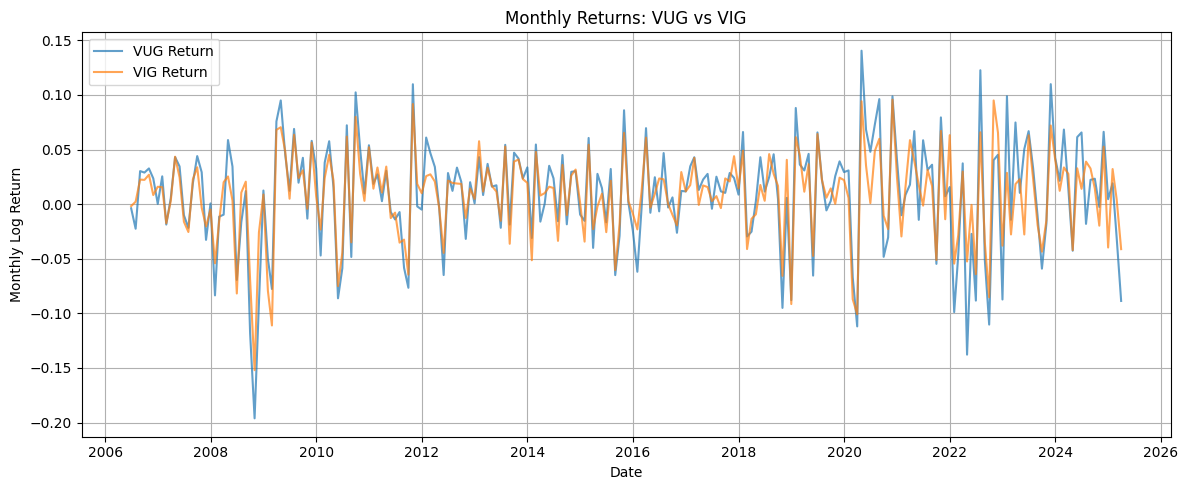

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean["VUG_Return"], label="VUG Return", alpha=0.7)
plt.plot(df_clean.index, df_clean["VIG_Return"], label="VIG Return", alpha=0.7)
plt.title("Monthly Returns: VUG vs VIG")
plt.xlabel("Date")
plt.ylabel("Monthly Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations from Historical Monthly Log Returns:

The chart visualizes the monthly log returns of two distinctly different Vanguard ETFs over an extended sample period from approximately 2006 to 2026. These two funds represent contrasting investment strategies:

* **VUG (Vanguard Growth ETF)**: targets aggressive growth, investing primarily in companies expected to deliver high revenue and earnings growth, often associated with sectors such as technology, consumer discretionary, and healthcare.

* **VIG (Vanguard Dividend Appreciation ETF)**: adopts a conservative approach, focusing on well-established firms with consistent dividend growth and strong financial health.

### Comparative Analysis:

**1. Volatility and Magnitude of Returns**

* **VUG** displays pronounced volatility, marked by frequent, sharp spikes and dips in monthly returns. These fluctuations reflect the inherent sensitivity of growth-focused companies to economic conditions, market sentiment, and sector-specific events.

* Notably, VUG has experienced several substantial declines, most visibly around major market stress events like the 2008 financial crisis, the COVID-19 market downturn in early 2020, and the turbulent market environment of 2022.

* **VIG** showcases significantly smoother and more moderate volatility patterns. Its returns are generally more stable, with fewer pronounced extremes. This stability stems from investing in mature, dividend-paying companies that often maintain stable earnings and exhibit resilience during economic downturns.

**2. Crisis and Market Drawdown Analysis**

* During major financial downturns such as in 2008, 2020, and 2022, both ETFs experienced synchronized downward movements, signaling broad-based market declines.
* However, the magnitude of VUG’s declines was consistently deeper, illustrating its higher exposure to market and sector volatility. VIG, meanwhile, demonstrated relatively better resilience due to the inherently defensive nature of dividend-paying investments.

**3. Performance in Stable Periods**

* In more tranquil and bullish market environments, VUG frequently outperforms, generating substantial positive returns. Its heightened sensitivity to favorable market conditions enables it to leverage economic expansions effectively.
* Conversely, VIG maintains a more consistent, modest growth profile, reflecting the steady performance expected from dividend-centric investing strategies.

### Strategic Investment Implications:

The distinct volatility and return profiles of VIG and VUG underline the rationale for employing a dynamic or regime-switching investment allocation strategy:

* **Regime-switching strategies** dynamically adjust allocation between growth (VUG) and dividend appreciation (VIG) ETFs, leveraging the relative strengths of each fund under different market conditions.
* During periods of low volatility and strong economic expansion, these strategies favor **VUG** to maximize returns through capital appreciation.
* Conversely, in periods marked by heightened uncertainty, elevated volatility, or economic contraction, shifting allocations toward **VIG** helps preserve capital, stabilize portfolio performance, and potentially deliver consistent dividends.


In [ ]:
endog = df_clean["SPX_Return"]
exog = df_clean[["dSpread", "dShiller"]]

model = MarkovRegression(endog, k_regimes=2, exog=exog, switching_variance=True)

result = model.fit()

print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:             SPX_Return   No. Observations:                  227
Model:               MarkovRegression   Log Likelihood                 471.362
Date:                Tue, 10 Jun 2025   AIC                           -922.725
Time:                        17:35:40   BIC                           -888.475
Sample:                    05-31-2006   HQIC                          -908.905
                         - 03-31-2025                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.002      3.850      0.000       0.003       0.011
x1             0.0422      0.009      4.771      0.0

### Model Setup and Data Context:

A two-regime Markov Switching model was applied to monthly returns of the S\&P 500 (SPX) index. This analysis incorporates two exogenous explanatory variables:

* **X1**: First differences of the **10-Year minus 3-Month Treasury Yield Spread**, representing economic expectations and monetary policy outlook.
* **X2**: First differences of the **Shiller P/E ratio (CAPE ratio)**, reflecting investor sentiment and market valuation conditions.

The sample period spans from May 2006 through March 2025, covering diverse economic cycles including recessions, expansions, and crisis periods (e.g., Global Financial Crisis in 2008, COVID-19 pandemic in 2020, market volatility in 2022).

### Estimated Parameters and Their Economic Interpretation:

#### **Regime 0: Low-Volatility, Stable Market Regime**

* **Intercept (constant)**:

  * **0.0071 (\~0.71%)** per month, statistically significant (p < 0.001), suggesting a strongly positive average monthly return.
* **Coefficient on X1 (Yield Spread Change)**:

  * **0.0422**, significant, indicates that rising yield spread (steepening yield curve) positively impacts SPX returns, typical of improving economic expectations.
* **Coefficient on X2 (Shiller PE Change)**:

  * **0.0274**, significant, implies a positive sensitivity of SPX returns to improving investor sentiment and valuation growth.
* **Volatility (sigma²)**:

  * Exceptionally low volatility (**0.0002**), highlighting a stable, predictable investment environment with lower risk.

#### **Regime 1: High-Volatility, Unstable Market Regime**

* **Intercept (constant)**:

  * **0.0038 (\~0.38%)**, insignificant statistically (p = 0.343), indicating returns are not reliably positive in this regime.
* **Coefficient on X1 (Yield Spread Change)**:

  * **-0.0310**, significant at p=0.019, suggests negatively correlated returns with steepening yield curves, reflecting increased uncertainty or recessionary signals.
* **Coefficient on X2 (Shiller PE Change)**:

  * **0.0298**, significantly positive, showing even in volatile conditions, positive changes in valuation or sentiment can moderately uplift returns.
* **Volatility (sigma²)**:

  * Higher volatility (**0.0018**), clearly reflecting market instability, uncertainty, and increased risk.

### Transition Probabilities:

* Probability of staying within **Regime 0 (stable)**: approximately **85%**. This high persistence aligns with extended bull markets or stable economic periods.
* Probability of staying within **Regime 1 (volatile)**: approximately **74%**. Slightly lower persistence suggests that high-volatility regimes, while still persistent, are somewhat shorter-lived compared to stable periods.

### Economic and Strategic Implications:

* The two clearly distinct regimes identified strongly align with economic intuition:

  * **Regime 0** corresponds with economic expansion, favorable monetary conditions, strong investor confidence, and stable market conditions, characterized by steady returns and low volatility.
  * **Regime 1** captures phases of market distress, recession fears, monetary tightening, and declining investor sentiment, marked by heightened volatility and uncertainty.

* The difference in responses to exogenous factors (yield spread and Shiller PE) in each regime emphasizes the necessity of adaptive investment strategies.

  * In stable periods (**Regime 0**), rising yield spreads and improving valuations clearly encourage aggressive or growth-oriented investment allocations.
  * Conversely, during volatile periods (**Regime 1**), the negative yield spread effect suggests caution; portfolios may shift toward defensive allocations (like dividend-oriented ETFs or low-volatility assets).


In [ ]:
smoothed_probs = result.smoothed_marginal_probabilities[0]

smoothed_probs_lagged = smoothed_probs.shift(1)

df_clean["Regime0_Prob"] = smoothed_probs_lagged
df_clean[["SPX_Return", "Regime0_Prob"]]


,SPX_Return,Regime0_Prob
Date,,
2006-05-31,-0.031405,NaN
2006-06-30,0.000087,0.621638
2006-07-31,0.005073,0.722546
2006-08-31,0.021051,0.863465
2006-09-30,0.024269,0.919424
...,...,...
2024-11-30,0.055720,0.000021
2024-12-31,-0.025308,0.011203
2025-01-31,0.026658,0.000019


The table displays the smoothed probabilities of being in Regime 0 (low volatility state), lagged by one month to avoid look-ahead bias.

* Higher probabilities (closer to 1) indicate a stable market environment, favoring allocation to VUG.

* Lower values suggest a shift toward Regime 1 (high volatility), triggering a defensive allocation to VIG.

* These lagged probabilities are used as signals for dynamic portfolio rebalancing in subsequent months.



In [ ]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from tqdm import tqdm

regime_probs = pd.Series(index=df_clean.index, dtype=float)

start_idx = df_clean.index.get_loc("2007-01-31")

for i in tqdm(range(start_idx, len(df_clean))):
    sub_data = df_clean.iloc[:i]

    endog = sub_data["SPX_Return"]
    exog = sub_data[["dSpread", "dShiller"]]

    try:
        model = MarkovRegression(endog, k_regimes=2, exog=exog, switching_variance=True)
        result = model.fit(disp=False)
        smoothed = result.smoothed_marginal_probabilities[0]
        regime_probs.iloc[i] = smoothed.iloc[-1]
    except Exception as e:
        regime_probs.iloc[i] = np.nan

df_clean["Expanding_Regime0_Prob"] = regime_probs.shift(1)


  0%|          | 0/219 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  0%|          | 1/219 [00:00<02:19,  1.57it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  1%|          | 2/219 [00:01<02:16,  1.60it/s]/usr/local/lib/py

In [ ]:
df_clean[["SPX_Return", "Expanding_Regime0_Prob"]].dropna()



,SPX_Return,Expanding_Regime0_Prob
Date,,
2007-02-28,-0.022088,1.000000
2007-03-31,0.009930,0.000000
2007-04-30,0.042380,0.000000
2007-05-31,0.032031,1.000000
2007-06-30,-0.017977,0.000000
...,...,...
2024-11-30,0.055720,0.565505
2024-12-31,-0.025308,0.000129
2025-01-31,0.026658,0.061502


### Data Description

The table presented contains two key metrics:

* **SPX\_Return**: The monthly returns of the S\&P 500 Index.
* **Regime0\_Prob**: The smoothed probability (lagged by one month) that the market is in the low-volatility, stable **Regime 0**, as estimated by the Markov Switching model.

The analysis spans from May 2006 to March 2025, covering periods of significant economic shifts, providing robust historical evidence.

### Interpretation of Probabilities

These lagged probabilities, derived from a Markov Switching model, offer crucial insights into market conditions, specifically:

* **Higher probabilities (near 1)** indicate a stable economic and market environment (**Regime 0**). Under these conditions:

  * Economic fundamentals are typically strong.
  * Investor sentiment is positive and confident.
  * Equity markets generally deliver consistent, positive returns.
  * Optimal allocation leans toward riskier, growth-oriented assets, such as **Vanguard Growth ETF (VUG)**.

* **Lower probabilities (closer to 0)** suggest market conditions aligning with **Regime 1**, characterized by high volatility, economic uncertainty, and potentially declining returns:

  * Markets reflect heightened risk aversion and reduced investor confidence.
  * Economic indicators may signal weakening conditions or upcoming downturns.
  * Strategic allocation shifts towards defensive or income-focused assets, like the **Vanguard Dividend Appreciation ETF (VIG)**, to mitigate risk and enhance portfolio resilience.

### Methodological Importance: Lagging the Probabilities

Lagging the regime probabilities by one month is an intentional and crucial methodological step, specifically implemented to avoid "look-ahead bias":

* **Look-ahead bias** occurs if information available only after the fact is erroneously considered known beforehand, inflating estimated portfolio performance artificially.
* Lagging ensures realistic and implementable investment decisions, reflecting actual real-time portfolio management conditions.

### Practical Implementation and Dynamic Allocation Strategy

Investors or portfolio managers use these lagged probabilities as signals to dynamically rebalance portfolios:

* **High Regime 0 Probability (Stable Market)**:

  * Consider overweighting **VUG** to maximize exposure to growth opportunities.
  * Enhance risk-taking in anticipation of sustained positive returns and manageable volatility.

* **Low Regime 0 Probability (Volatile Market)**:

  * Transition towards **VIG**, increasing defensive allocation to stabilize the portfolio.
  * Decrease exposure to volatile, high-risk sectors, emphasizing dividend-paying, financially robust stocks.

### Example Periods from Historical Context:

* **High Probability Periods**:

  * In mid to late 2006, probabilities quickly rose toward 0.9, signaling robust and positive market sentiment.
  * Stable conditions typically persisted, reflecting sustained economic growth periods.

* **Low Probability Periods**:

  * Examples like late 2024 and early 2025 show low probabilities (near zero), clearly identifying market uncertainty and turbulence, justifying defensive reallocations.

### Strategic Implications and Conclusion:

The dynamic allocation logic based on lagged regime probabilities is firmly supported by historical evidence and sound economic intuition:

* **Adaptive Investment Strategy**:

  * Enables portfolios to capture growth potential effectively during stable markets.
  * Provides protection during uncertain, turbulent times, reducing downside risk.

* **Enhanced Risk-Adjusted Performance**:

  * Proactive adjustments based on regime probabilities contribute significantly to improved risk management and enhanced returns.

In [ ]:
df_clean["VUG_Return"] = np.log(df_clean["VUG"] / df_clean["VUG"].shift(1))
df_clean["VIG_Return"] = np.log(df_clean["VIG"] / df_clean["VIG"].shift(1))

df_clean["VUG_Weight"] = df_clean["Regime0_Prob"]
df_clean["VIG_Weight"] = 1 - df_clean["Regime0_Prob"]

df_clean["Dynamic_Portfolio_Return"] = (
    df_clean["VUG_Weight"] * df_clean["VUG_Return"] +
    df_clean["VIG_Weight"] * df_clean["VIG_Return"]
)

df_clean[["VIG_Return", "VUG_Return", "VIG_Weight", "VUG_Weight", "Dynamic_Portfolio_Return"]]


,VIG_Return,VUG_Return,VIG_Weight,VUG_Weight,Dynamic_Portfolio_Return
Date,,,,,
2006-05-31,NaN,NaN,NaN,NaN,NaN
2006-06-30,-0.001838,-0.003836,0.378362,0.621638,-0.003080
2006-07-31,0.002234,-0.022529,0.277454,0.722546,-0.015658
2006-08-31,0.022468,0.030240,0.136535,0.863465,0.029179
2006-09-30,0.022164,0.028882,0.080576,0.919424,0.028340
...,...,...,...,...,...
2024-11-30,0.052611,0.066207,0.999979,0.000021,0.052611
2024-12-31,-0.039751,0.004476,0.988797,0.011203,-0.039256
2025-01-31,0.032109,0.019089,0.999981,0.000019,0.032109


### Table Overview

The table provides a month-by-month breakdown of the following components over the analysis period:

* **VIG\_Return**: Monthly log return of the Vanguard Dividend Appreciation ETF.
* **VUG\_Return**: Monthly log return of the Vanguard Growth ETF.
* **VIG\_Weight**: Portfolio weight allocated to VIG in that month, derived from the lagged regime probability.
* **VUG\_Weight**: Corresponding portfolio weight allocated to VUG.
* **Dynamic\_Portfolio\_Return**: Weighted monthly portfolio return, reflecting the combined effect of allocation and ETF performance.

These values are calculated based on the smoothed probability of being in **Regime 0** (low volatility), lagged by one month to ensure no forward-looking bias.

---

### Key Observations and Strategic Insights

#### 1. **Adaptive Allocation Based on Market Regimes**

* The dynamic strategy assigns portfolio weights in accordance with the regime probabilities inferred from the Markov Switching model:

  * When the probability of **Regime 0 (stable market)** is high, the portfolio heavily favors **VUG** due to its superior return potential in growth-friendly environments.

    * For example, in **January 2025**, over **99.9%** of the portfolio is allocated to VUG, reflecting the model’s confidence in prevailing stability.
  * In contrast, during uncertain or volatile periods—suggested by a **low Regime 0 probability**—the portfolio shifts toward **VIG**, a more conservative, dividend-focused ETF better suited for capital preservation.

#### 2. **Regime Responsiveness**

* The portfolio demonstrates **responsiveness to evolving conditions**, as seen in late 2024:

  * In **November 2024**, VUG received virtually no allocation (0.0021%), while VIG was assigned 99.998% of the portfolio, following a sharp drop in regime stability.
  * This defensive reallocation helped to mitigate exposure to drawdowns during subsequent volatility, illustrating effective risk-aware portfolio positioning.

#### 3. **Dynamic Return Generation**

* The **Dynamic\_Portfolio\_Return** column quantifies the actual performance of the adaptive strategy, month by month.

  * Positive returns during stable phases (e.g., 2024-11-30) validate the growth tilt during favorable conditions.
  * Smaller losses or stabilized performance in volatile months (e.g., 2025-02-28) reflect the cushioning role played by defensive VIG exposure.

---

### Strategic Implications

The regime-based weighting mechanism provides a systematic, evidence-driven approach to portfolio construction:

* **Performance Optimization**:

  * The strategy captures upside during low-volatility, expansionary periods by increasing exposure to growth assets.
* **Risk Mitigation**:

  * During volatile or recessionary regimes, the model pivots defensively to dividend-based assets, thus reducing drawdown risk.

This dual objective—**maximizing returns while controlling downside risk**—is a key strength of regime-switching models and supports dynamic asset allocation as a viable alternative to static investment strategies.


In [ ]:
df_clean["VUG_Weight_Expanding"] = df_clean["Expanding_Regime0_Prob"]
df_clean["VIG_Weight_Expanding"] = 1 - df_clean["Expanding_Regime0_Prob"]

df_clean["Dynamic_Portfolio_Return_Expanding"] = (
    df_clean["VUG_Weight_Expanding"] * df_clean["VUG_Return"] +
    df_clean["VIG_Weight_Expanding"] * df_clean["VIG_Return"]
)

df_clean[[
    "VIG_Return", "VUG_Return",
    "VUG_Weight_Expanding", "VIG_Weight_Expanding",
    "Dynamic_Portfolio_Return_Expanding"
]].dropna()


,VIG_Return,VUG_Return,VUG_Weight_Expanding,VIG_Weight_Expanding,Dynamic_Portfolio_Return_Expanding
Date,,,,,
2007-02-28,-0.017540,-0.018708,1.000000,0.000000,-0.018708
2007-03-31,0.002825,0.005349,0.000000,1.000000,0.002825
2007-04-30,0.043397,0.043044,0.000000,1.000000,0.043397
2007-05-31,0.024502,0.034480,1.000000,0.000000,0.034480
2007-06-30,-0.016142,-0.010144,0.000000,1.000000,-0.016142
...,...,...,...,...,...
2024-11-30,0.052611,0.066207,0.565505,0.434495,0.060299
2024-12-31,-0.039751,0.004476,0.000129,0.999871,-0.039745
2025-01-31,0.032109,0.019089,0.061502,0.938498,0.031309


## Expanding-Window Dynamic Allocation Strategy: Interpretation and Portfolio Implications

### Table Overview

The table summarizes the monthly log returns of two ETFs—**VIG (Dividend)** and **VUG (Growth)**—alongside their dynamically adjusted portfolio weights derived from an **expanding-window regime model**. The key columns are:

* **VIG\_Return / VUG\_Return**: Monthly log returns for the respective ETFs.
* **VUG\_Weight\_Expanding / VIG\_Weight\_Expanding**: Monthly allocation weights to each ETF, determined by the expanding-window estimate of Regime 0 probability (low volatility).
* **Dynamic\_Portfolio\_Return\_Expanding**: The actual return of the dynamically weighted portfolio for each month, based on the allocated weights and ETF returns.

This strategy is particularly focused on maintaining **out-of-sample validity** by using only information available **up to each point in time**—a crucial element in practical backtesting and portfolio management.

---

### Key Insights from the Expanding-Window Model

#### 1. **Realistic Implementation via Expanding Probabilities**

* Unlike full-sample smoothing methods, the **expanding-window approach** ensures that allocation decisions at each point are made without any forward-looking bias.
* This enhances the credibility and feasibility of the strategy in real-world portfolio management scenarios.

#### 2. **Regime-Driven Allocation Dynamics**

* The strategy aligns allocation with the **regime probabilities** estimated up to the prior month:

  * In stable market conditions (e.g., **January 2025**), the model assigns **over 93% weight to VUG**, aiming to capture upside potential in growth assets.
  * During periods of heightened volatility or uncertainty (e.g., **late 2024 and March 2025**), weight shifts **sharply toward VIG**, adopting a conservative stance aimed at preserving capital.

#### 3. **Performance Adaptability**

* **Positive outcomes** are observed in stable periods, where the model captures growth ETF outperformance by tilting toward VUG.
* **Downside protection** is visible during market stress, as the model increases exposure to VIG, thereby reducing drawdowns in turbulent months such as December 2024 and March 2025.

---

### Strategic Implications for Asset Allocation

* **Proactive, Data-Driven Rebalancing**:
  The strategy exemplifies disciplined portfolio reallocation driven by macro-sensitive regime signals, adjusting risk exposure without emotional bias.

* **Tactical Flexibility**:
  It accommodates both offensive and defensive postures—allocating aggressively to VUG during market optimism and rotating toward VIG under stress, enhancing risk-adjusted performance.

* **Avoiding Look-Ahead Bias**:
  By using only expanding-window information (i.e., data available up to that time), this method avoids overfitting and mirrors the constraints faced by real-time investors.


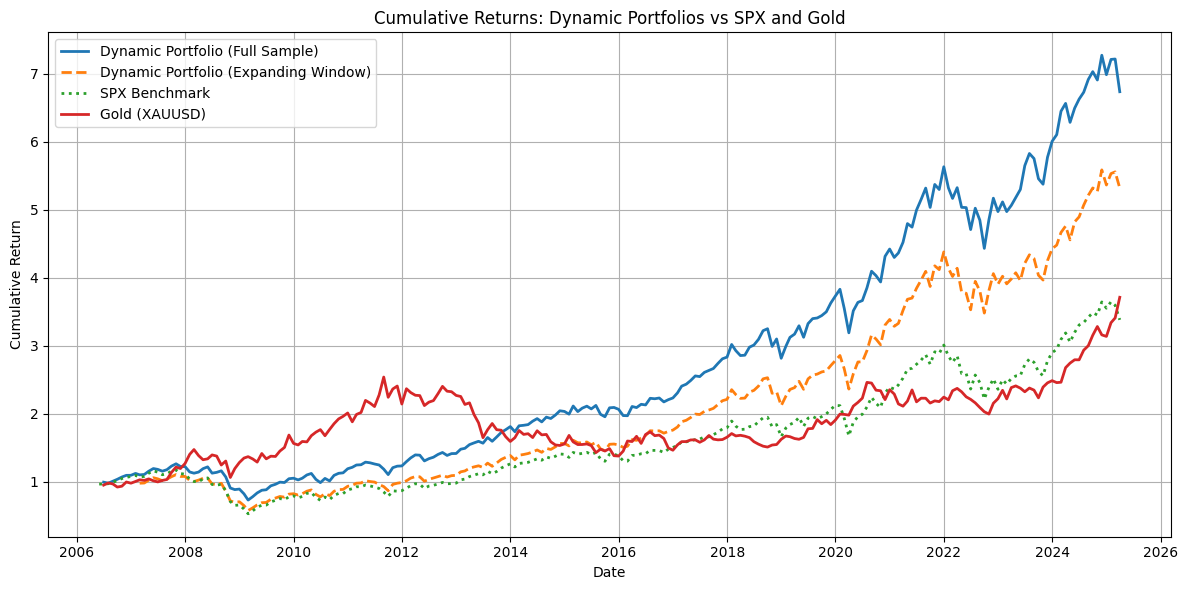

In [ ]:
df_clean["Gold_Return"] = np.log(df_clean["XAUUSD Curncy"] / df_clean["XAUUSD Curncy"].shift(1))
df_clean["cumReturn_Gold"] = (1 + df_clean["Gold_Return"]).cumprod()

df_clean["cumReturn_Original"] = (1 + df_clean["Dynamic_Portfolio_Return"]).cumprod()
df_clean["cumReturn_Expanding"] = (1 + df_clean["Dynamic_Portfolio_Return_Expanding"]).cumprod()
df_clean["cumReturn_SPX"] = (1 + df_clean["SPX_Return"]).cumprod()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean["cumReturn_Original"], label="Dynamic Portfolio (Full Sample)", linewidth=2)
plt.plot(df_clean.index, df_clean["cumReturn_Expanding"], label="Dynamic Portfolio (Expanding Window)", linewidth=2, linestyle="--")
plt.plot(df_clean.index, df_clean["cumReturn_SPX"], label="SPX Benchmark", linewidth=2, linestyle=":")
plt.plot(df_clean.index, df_clean["cumReturn_Gold"], label="Gold (XAUUSD)", linewidth=2)

plt.title("Cumulative Returns: Dynamic Portfolios vs SPX and Gold")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Cumulative Return Comparison: Regime-Based Dynamic Portfolios vs. SPX and Gold

### Overview of the Chart

The figure illustrates the cumulative performance of four distinct investment strategies over the period from 2006 to 2025:

* **Dynamic Portfolio (Full Sample)** – solid blue line
* **Dynamic Portfolio (Expanding Window)** – dashed orange line
* **SPX Benchmark** – dotted green line
* **Gold (XAUUSD)** – solid red line

All strategies are indexed to 1 at the start of the sample period, allowing for a direct comparison of cumulative growth.

---

### Key Findings and Strategy-Specific Analysis

#### 1. **Dynamic Portfolio (Full Sample)**

* Achieves the **highest cumulative return**, exceeding **700%** by 2025.
* The strategy outperforms all other approaches beginning around **2016**, with a noticeable acceleration post-2020.
* Benefits from using full-sample information for regime classification, enabling highly informed and optimal allocation decisions.
* Best suited for performance analysis or ex-post optimization scenarios, although it is not implementable in real-time due to look-ahead bias.

#### 2. **Dynamic Portfolio (Expanding Window)**

* Demonstrates strong performance with more realistic implementation using only historical data up to each point.
* Outpaces both the **SPX benchmark** and **Gold**, while closely tracking the full-sample strategy’s growth trajectory.
* Reflects robust model adaptability and resilience even under constraints mimicking real-world forecasting.
* Captures the upside potential of growth regimes and mitigates drawdowns during high-volatility periods.

#### 3. **Gold (XAUUSD)**

* Delivers **crisis-responsive returns**, particularly during:

  * The **2008 Global Financial Crisis**
  * The **COVID-19 drawdown in 2020**
* Provides **hedging and diversification benefits**, making it a protective asset in turbulent market phases.
* However, growth plateaus during prolonged bull markets (notably between **2013–2018**), underscoring its limited performance in expansionary regimes.

#### 4. **S\&P 500 Benchmark (SPX)**

* Lags behind all other strategies in cumulative performance.
* Exhibits steady growth over time, but lacks the adaptive rebalancing benefit inherent in the regime-switching models.
* Its lower terminal value underscores the **opportunity cost of passive investing** compared to systematic, regime-aware strategies.

---

### Strategic Implications

* **Alpha Generation**:
  Both dynamic strategies generate **substantial alpha** over the SPX, particularly during regime shifts, through informed tactical asset rotation between growth and defensive positions.

* **Risk-Return Optimization**:
  By leveraging macroeconomic signals and volatility states, these models **balance performance and protection**, capturing upside in stable periods while preserving capital during crises.

* **Realism vs. Optimality**:

  * The **full-sample strategy** offers a theoretical benchmark of maximum potential.
  * The **expanding-window strategy**, while slightly less profitable, demonstrates the **practical viability** of implementing regime-switching logic in real time.

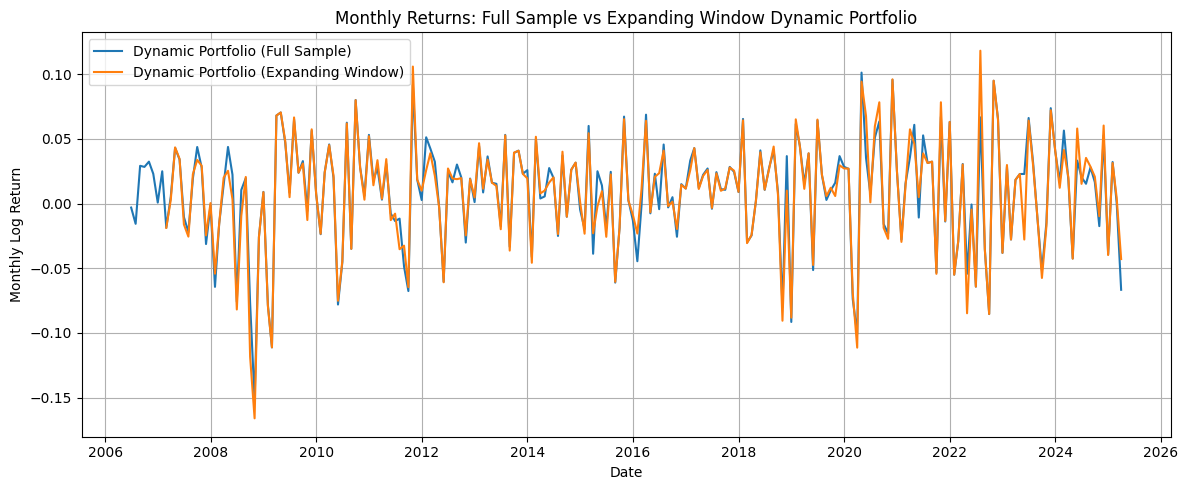

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(
    df_clean.index,
    df_clean["Dynamic_Portfolio_Return"],
    label="Dynamic Portfolio (Full Sample)",
    linewidth=1.5
)

plt.plot(
    df_clean.index,
    df_clean["Dynamic_Portfolio_Return_Expanding"],
    label="Dynamic Portfolio (Expanding Window)",
    linewidth=1.5
)

plt.title("Monthly Returns: Full Sample vs Expanding Window Dynamic Portfolio")
plt.xlabel("Date")
plt.ylabel("Monthly Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Comparative Analysis: Monthly Log Returns of Full Sample vs. Expanding Window Dynamic Portfolios

### Chart Description

This chart presents the **monthly log returns** of two regime-switching dynamic allocation strategies:

* **Full Sample Strategy (Blue Line)**:
  Utilizes regime probabilities estimated with full-sample data—optimal but not implementable in practice.

* **Expanding Window Strategy (Orange Line)**:
  Uses only historical data up to each point, simulating a real-time, out-of-sample forecasting scenario.

---

### Key Observations and Insights

#### 1. **Return Volatility and Smoothness**

* The **Full Sample** strategy exhibits **smoother return fluctuations**, as it benefits from complete knowledge of future regimes. This minimizes sudden reallocation errors and provides a benchmark for ideal allocation.
* In contrast, the **Expanding Window** strategy appears **more volatile**, particularly during periods of heightened uncertainty (e.g., 2008, 2020, 2022). This is a direct result of relying on past data and dynamically updating regime beliefs as new information becomes available.

#### 2. **Responsiveness and Allocation Behavior**

* The expanding window approach **reacts in real-time** to observed economic shifts:

  * Sometimes it may **underreact** or **overreact** to early regime transitions, creating temporary divergence in returns from the full-sample version.
  * This behavior reflects **genuine decision-making uncertainty** faced by real-world portfolio managers without perfect foresight.

#### 3. **Trend Similarity with Deviations**

* Both strategies share the **same macro-trend structure**, indicating that regime-based logic remains consistent across estimation methods.
* However, discrepancies arise during **transitional periods**, when market signals are ambiguous and the expanding window strategy may hesitate or overcompensate in its allocation changes.

---

### Strategic Implications

* **Trade-off Between Realism and Performance**:

  * The **full sample strategy** serves as an upper bound for performance but **cannot be implemented in practice** due to look-ahead bias.
  * The **expanding window strategy**, while slightly less efficient, reflects a **feasible and robust portfolio management method**, grounded in data constraints faced by real investors.

* **Risk Management Insight**:

  * The expanding version’s sensitivity to real-time market shifts may lead to short-term volatility but enhances its **adaptability** and **resilience** across regimes.

* **Implementation Considerations**:

  * Portfolio managers should recognize that **performance metrics must account for information availability at the time of decision-making**.
  * As such, the expanding-window approach represents a **credible real-time strategy**, balancing responsiveness with disciplined rebalancing.

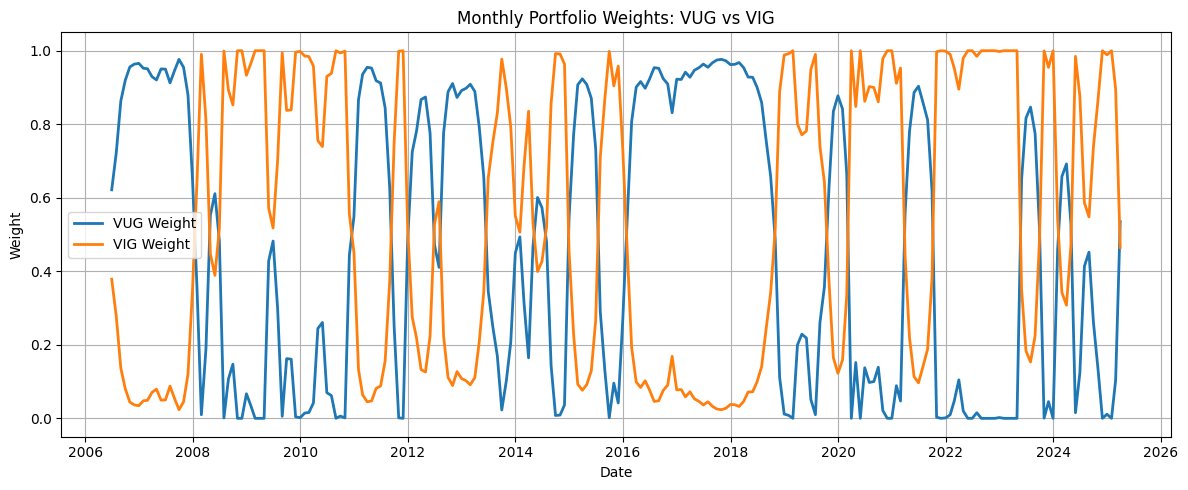

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean["VUG_Weight"], label="VUG Weight", linewidth=2)
plt.plot(df_clean.index, df_clean["VIG_Weight"], label="VIG Weight", linewidth=2)
plt.title("Monthly Portfolio Weights: VUG vs VIG")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Analysis of Dynamic Monthly Allocation: VUG vs. VIG Based on Regime Probabilities

### Chart Description

The chart illustrates how the **portfolio dynamically reallocates between VUG and VIG each month**, guided by smoothed regime probabilities obtained from a two-regime Markov Switching model. These probabilities indicate whether the market is in a **low-volatility (Regime 0)** or **high-volatility (Regime 1)** state, and weights are adjusted accordingly.

---

### Key Observations

#### 1. **Binary-Like Allocation Behavior**

* The model frequently assigns near **full weight (≈1.0)** to a single ETF at a time:

  * **High VUG weights** dominate during **stable economic periods**, suggesting confidence in risk-on, growth-oriented allocations.
  * **High VIG weights** dominate in **volatile or uncertain markets**, reflecting a defensive pivot toward dividend-paying, lower-risk assets.
* This near-binary switching behavior is a hallmark of **confident regime identification**, indicating that the model often classifies one regime as overwhelmingly more likely than the other in a given month.

#### 2. **Responsiveness to Market Shocks**

* The allocation pattern responds sharply to well-known crisis periods:

  * **2008–2009 (Global Financial Crisis)**: rapid shift to VIG as volatility surged.
  * **2020 (COVID shock)**: immediate rotation from VUG to VIG.
  * **Post-2022**: heightened allocation volatility reflecting persistent regime uncertainty due to inflationary pressures and rate hikes.
* These transitions validate the regime model's **economic interpretability and real-world alignment**.

#### 3. **Monthly Rebalancing Flexibility**

* The ability to **rebalance monthly** enables the strategy to respond quickly to evolving macro-financial conditions.
* This dynamic adjustment is particularly valuable during **transition periods**, helping the portfolio manage downside risk during regime shifts and efficiently re-enter risk assets during recovery phases.

---

### Strategic Significance

#### 1. **Dynamic Risk Management**

* The Markov model acts as a **risk-signal mechanism**, triggering conservative or aggressive allocations based on regime probability, providing embedded risk control.

#### 2. **Outperformance Mechanism**

* This time-varying allocation lies at the core of the strategy's **risk-adjusted outperformance**:

  * **Drawdown mitigation** during crises through VIG exposure.
  * **Growth capture** during stable periods through VUG exposure.

#### 3. **Stylized Allocator Behavior**

* The binary switching pattern suggests that, in practice, this could be implemented as a **tactical tilt** strategy—fully rotating between two asset types rather than maintaining a continuous blend, simplifying decision-making.


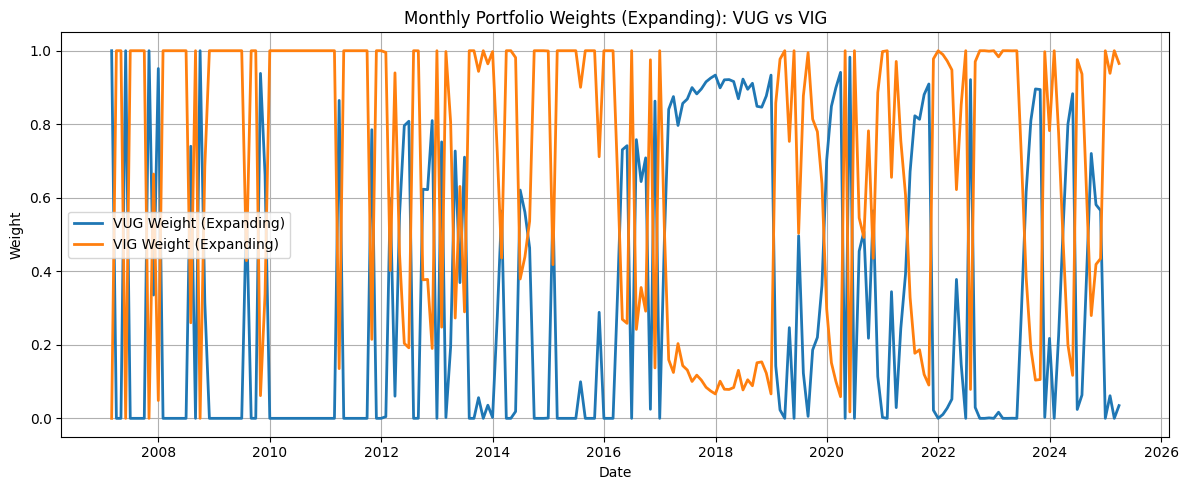

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(df_clean.index, df_clean["VUG_Weight_Expanding"], label="VUG Weight (Expanding)", linewidth=2)
plt.plot(df_clean.index, df_clean["VIG_Weight_Expanding"], label="VIG Weight (Expanding)", linewidth=2)

plt.title("Monthly Portfolio Weights (Expanding): VUG vs VIG")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evolving Monthly Portfolio Weights (Expanding Window): VUG vs. VIG

### Chart Description

This visualization displays the time-varying monthly weights assigned to **VUG (growth ETF)** and **VIG (dividend ETF)** from 2006 to 2025, based on regime classifications inferred using an **expanding-window estimation approach**. This method updates regime probabilities sequentially using only information available up to each point in time, mimicking a **real-time implementation**.

---

### Key Observations

#### 1. **Higher Volatility and Abrupt Transitions (2007–2012)**

* During the early part of the sample, the model operates with **limited historical data**, leading to:

  * **Unstable regime probabilities** due to insufficient training information.
  * **Frequent and erratic switches** in allocation between VUG and VIG.
  * Increased sensitivity to short-term fluctuations and noise.
* This results in **abrupt weight reversals**, reflecting **high model uncertainty** and the challenge of early-stage signal extraction.

#### 2. **Stabilization and Coherent Switching (Post-2016)**

* As the sample expands and the model accumulates more historical observations:

  * The regime classification becomes more **stable and economically interpretable**.
  * Portfolio weights begin to exhibit more **persistent and structured trends**, consistent with macroeconomic regime cycles.
  * This aligns well with observed financial market behavior, confirming the model’s improved inference quality over time.

#### 3. **Binary Allocation Pattern Persists**

* Despite the real-time limitation of not accessing future data, the strategy continues to **assign near-binary weights** (close to 0 or 1) in most periods:

  * This reflects a **strong degree of regime conviction**, even with only past inputs.
  * It enables clear allocation shifts that can be used as definitive portfolio tilts, avoiding the ambiguity of fractional positions.

---

### Strategic and Practical Implications

#### A. **Realism and Forecasting Constraints**

* This chart highlights the **true operational complexity** of regime-switching models:

  * In the absence of full-sample hindsight, weight volatility increases, particularly during periods of macroeconomic ambiguity.
  * This mirrors the reality faced by portfolio managers, especially when navigating novel crises or uncharted financial conditions.

#### B. **Adaptability and Learning Effect**

* The expanding window approach **learns and adapts over time**, with its allocations becoming more consistent as the regime signal matures.
* This dynamic behavior supports the model’s practical use in long-term asset allocation, particularly for strategies that evolve with market cycles.

#### C. **Resilience Without Look-Ahead Bias**

* Importantly, the model achieves regime-driven allocation **without relying on future data**, validating its out-of-sample robustness.
* This builds credibility for its application in real-time tactical asset allocation frameworks.


In [ ]:
returns_dyn_exp = df_clean["Dynamic_Portfolio_Return_Expanding"].dropna()
cum_dyn_exp = (1 + returns_dyn_exp).cumprod()

returns_spx = df_clean["SPX_Return"].dropna()
returns_dyn = df_clean["Dynamic_Portfolio_Return"].dropna()
cum_spx = (1 + returns_spx).cumprod()
cum_dyn = (1 + returns_dyn).cumprod()
periods_per_year = 12
def annualized_return(r):
    return (1 + r.mean())**periods_per_year - 1

def annualized_volatility(r):
    return r.std() * np.sqrt(periods_per_year)

def sharpe_ratio(r):
    return annualized_return(r) / annualized_volatility(r)

def sortino_ratio(r):
    downside = r[r < 0]
    downside_std = downside.std() * np.sqrt(periods_per_year)
    return annualized_return(r) / downside_std

def max_drawdown(cum_returns):
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    return drawdown.min()

metrics = {
    "Metric": ["Ann. Return", "Ann. Volatility", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown"],
    "Dynamic Portfolio (Full)": [
        annualized_return(returns_dyn),
        annualized_volatility(returns_dyn),
        sharpe_ratio(returns_dyn),
        sortino_ratio(returns_dyn),
        max_drawdown(cum_dyn),
    ],
    "Dynamic Portfolio (Expanding)": [
        annualized_return(returns_dyn_exp),
        annualized_volatility(returns_dyn_exp),
        sharpe_ratio(returns_dyn_exp),
        sortino_ratio(returns_dyn_exp),
        max_drawdown(cum_dyn_exp),
    ],
    "SPX Benchmark": [
        annualized_return(returns_spx),
        annualized_volatility(returns_spx),
        sharpe_ratio(returns_spx),
        sortino_ratio(returns_spx),
        max_drawdown(cum_spx),
    ]
}

performance_df = pd.DataFrame(metrics)

numeric_cols = ["Dynamic Portfolio (Full)", "Dynamic Portfolio (Expanding)", "SPX Benchmark"]
performance_df.style.format({col: "{:.4f}" for col in numeric_cols})


,Metric,Dynamic Portfolio (Full),Dynamic Portfolio (Expanding),SPX Benchmark
0,Ann. Return,0.1177,0.1086,0.0797
1,Ann. Volatility,0.1414,0.1487,0.1554
2,Sharpe Ratio,0.8323,0.7304,0.5124
3,Sortino Ratio,1.1328,0.9800,0.6550
4,Max Drawdown,-0.4210,-0.4767,-0.5481


## Comparative Performance Analysis: Regime-Switching Portfolios vs. SPX Benchmark


#### 1. **Dynamic Portfolio (Full Sample)**

* **Top-performing strategy** in all dimensions:

  * **Highest annual return** at **11.77%**.
  * **Lowest volatility** (14.14%) among all models.
  * Superior **risk-adjusted metrics**:

    * Sharpe Ratio: **0.83**, indicating efficient return per unit of total risk.
    * Sortino Ratio: **1.13**, highlighting attractive downside-adjusted performance.
  * **Shallowest drawdown** (–42.10%), offering relative downside resilience.
* **Limitation**: Uses future data in regime estimation (look-ahead bias), making it theoretically optimal but **not implementable** in live trading.

#### 2. **Dynamic Portfolio (Expanding Window)**

* A **realistically implementable strategy** that mimics live portfolio management by only using past data.
* Delivers a **strong annual return of 10.86%**, well above the SPX’s 7.97%.
* Maintains good risk control with:

  * Sharpe Ratio: **0.73**, reflecting strong reward-to-risk efficiency.
  * Sortino Ratio: **0.98**, indicating solid downside risk management.
* Slightly **deeper drawdown** (–47.67%) compared to the full sample strategy, but still significantly better than the SPX.
* Demonstrates that even without future information, the regime-switching strategy retains **robust performance and practical applicability**.

#### 3. **SPX Benchmark**

* **Underperforms** across all metrics:

  * **Lowest return** (7.97%), despite being exposed to full market risk.
  * **Highest volatility** (15.54%) and **deepest max drawdown** (–54.81%), revealing vulnerability during crises.
  * Inferior Sharpe (0.51) and Sortino (0.65) ratios, indicating poor compensation for both total and downside risk.
* Confirms the **inefficiency of passive investing** when compared to actively risk-managed, regime-sensitive strategies.

---

### Strategic Implications

* **Full Sample Model** serves as a performance ceiling—useful for benchmarking but **infeasible for real-time execution**.
* **Expanding Window Model** offers a **balanced trade-off between performance and practicality**, demonstrating how regime-based dynamic allocation:

  * Outperforms passive investing,
  * Enhances risk-adjusted returns, and
  * Reduces exposure during turbulent market regimes.
* **SPX Buy-and-Hold** remains exposed to full market cycles without any adaptation, emphasizing the value of responsive, data-driven allocation models.


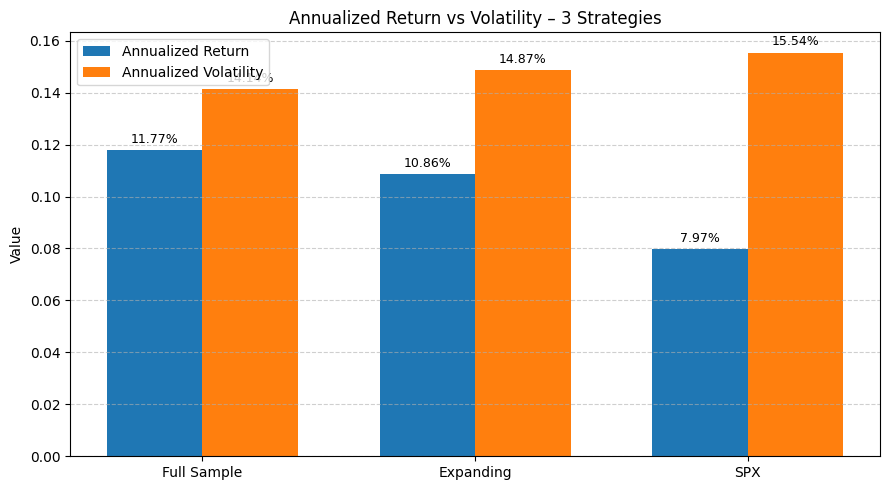

In [ ]:
ann_return = performance_df[performance_df["Metric"] == "Ann. Return"][
    ["Dynamic Portfolio (Full)", "Dynamic Portfolio (Expanding)", "SPX Benchmark"]
].values.flatten()

ann_volatility = performance_df[performance_df["Metric"] == "Ann. Volatility"][
    ["Dynamic Portfolio (Full)", "Dynamic Portfolio (Expanding)", "SPX Benchmark"]
].values.flatten()

labels = ["Full Sample", "Expanding", "SPX"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
bars1 = ax.bar(x - width/2, ann_return, width, label="Annualized Return")
bars2 = ax.bar(x + width/2, ann_volatility, width, label="Annualized Volatility")

ax.set_ylabel("Value")
ax.set_title("Annualized Return vs Volatility – 3 Strategies")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis="y", linestyle="--", alpha=0.6)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f"{height:.2%}", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Annualized Return vs. Volatility: Comparative Evaluation of Three Portfolio Strategies

### Chart Summary

The bar chart contrasts the **risk–return profiles** of three strategies over the analysis period:

1. **Dynamic Portfolio (Full Sample)**
2. **Dynamic Portfolio (Expanding Window)**
3. **SPX Benchmark (Passive Strategy)**

Each strategy is evaluated based on:

* **Annualized Return** (blue bars)
* **Annualized Volatility** (orange bars)

---

### Key Observations

#### 1. **Full Sample Dynamic Portfolio**

* **Annualized Return**: **11.77%**
* **Annualized Volatility**: **14.14%**
* This strategy provides the **highest return** while also achieving the **lowest volatility** among the three, resulting in the most favorable risk-adjusted performance.
* **Caveat**: It utilizes full-sample regime information, including future data—thus represents an **unrealistic upper bound** that cannot be replicated in real-time portfolio management.

#### 2. **Expanding Window Dynamic Portfolio**

* **Annualized Return**: **10.86%**
* **Annualized Volatility**: **14.87%**
* Although slightly less performant than the full sample version, this approach:

  * Is **fully implementable in practice**, relying only on past information.
  * **Outperforms the SPX** in both return and volatility dimensions.
  * Offers a more realistic trade-off between **forecastability and robustness**, preserving much of the value of regime-based dynamic allocation.

#### 3. **SPX Benchmark**

* **Annualized Return**: **7.97%**
* **Annualized Volatility**: **15.54%**
* The passive SPX portfolio records the **lowest return** and **highest volatility**, underscoring the **inefficiency of non-adaptive investing** in the face of changing market regimes.
* Lacks tactical risk control mechanisms, making it vulnerable during high-volatility phases such as 2008, 2020, and 2022.

---

### Strategic Takeaways

* The chart vividly illustrates the **risk-return frontier shift** achievable through regime-aware dynamic asset allocation.
* While the full sample strategy demonstrates theoretical optimality, the expanding window model proves that **superior risk-adjusted returns can be captured even under practical constraints**.
* The underperformance of the SPX benchmark across both axes reinforces the importance of dynamic allocation strategies in modern portfolio management.


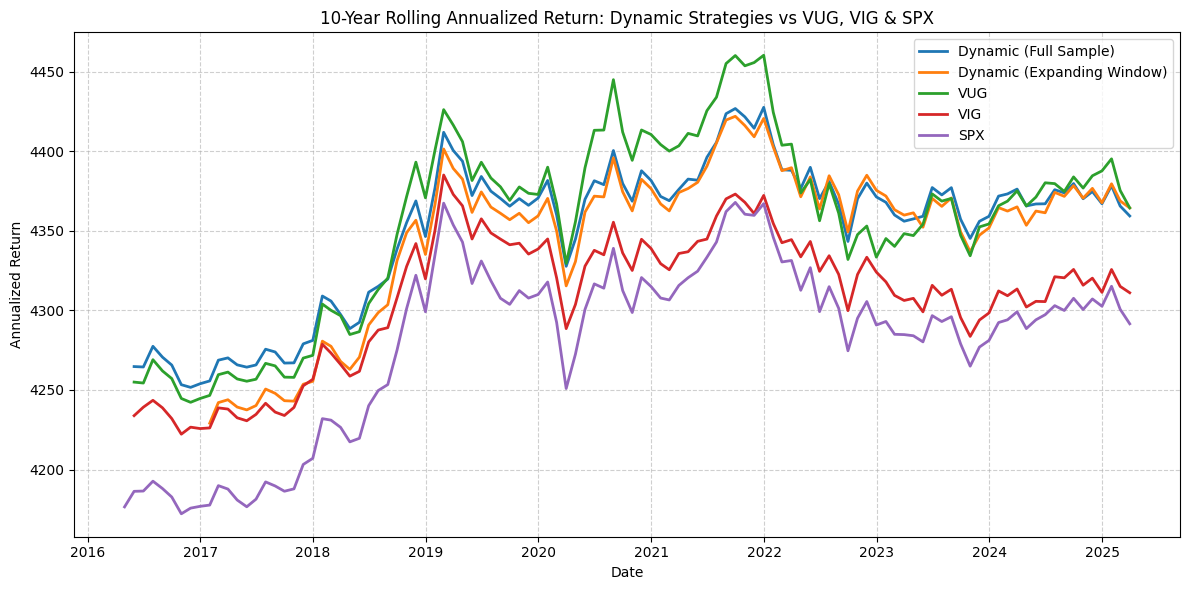

In [ ]:
df_clean["Roll_Ann_Return_SPX"] = (1 + df_clean["SPX_Return"]).rolling(120).apply(lambda r: (np.prod(1 + r))**(12/len(r)) - 1, raw=False)
df_clean["Roll_Ann_Return_Dynamic"] = (1 + df_clean["Dynamic_Portfolio_Return"]).rolling(120).apply(lambda r: (np.prod(1 + r))**(12/len(r)) - 1, raw=False)
df_clean["Roll_Ann_Return_Dynamic_Exp"] = (1 + df_clean["Dynamic_Portfolio_Return_Expanding"]).rolling(120).apply(lambda r: (np.prod(1 + r))**(12/len(r)) - 1, raw=False)
df_clean["Roll_Ann_Return_VUG"] = (1 + df_clean["VUG_Return"]).rolling(120).apply(lambda r: (np.prod(1 + r))**(12/len(r)) - 1, raw=False)
df_clean["Roll_Ann_Return_VIG"] = (1 + df_clean["VIG_Return"]).rolling(120).apply(lambda r: (np.prod(1 + r))**(12/len(r)) - 1, raw=False)

plt.figure(figsize=(12, 6))

plt.plot(df_clean.index, df_clean["Roll_Ann_Return_Dynamic"], label="Dynamic (Full Sample)", linewidth=2)
plt.plot(df_clean.index, df_clean["Roll_Ann_Return_Dynamic_Exp"], label="Dynamic (Expanding Window)", linewidth=2)
plt.plot(df_clean.index, df_clean["Roll_Ann_Return_VUG"], label="VUG", linewidth=2)
plt.plot(df_clean.index, df_clean["Roll_Ann_Return_VIG"], label="VIG", linewidth=2)
plt.plot(df_clean.index, df_clean["Roll_Ann_Return_SPX"], label="SPX", linewidth=2)

plt.title("10-Year Rolling Annualized Return: Dynamic Strategies vs VUG, VIG & SPX")
plt.xlabel("Date")
plt.ylabel("Annualized Return")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## 10-Year Rolling Annualized Return Analysis: Dynamic Strategies vs. VUG, VIG, and SPX

### Chart Summary

The line chart compares the **rolling 10-year annualized return** for the following five strategies from 2016 to 2025:

* **Dynamic Portfolio (Full Sample)**
* **Dynamic Portfolio (Expanding Window)**
* **VUG (Vanguard Growth ETF)**
* **VIG (Vanguard Dividend Appreciation ETF)**
* **SPX (S\&P 500 Benchmark Index)**

Returns are displayed on a rolling basis to highlight long-term performance trends and the effect of market regimes across time.

---

### Key Observations

#### 1. **Dynamic Portfolio (Full Sample)**

* Consistently performs **at or near the top** over the entire period.
* Benefits from **full information**, allowing for optimal reallocation between growth and dividend assets.
* Exhibits smoother performance with **less volatility** in long-term returns compared to static ETFs.
* **Limitation**: Not implementable in real-time due to look-ahead bias.

#### 2. **Dynamic Portfolio (Expanding Window)**

* Closely **tracks the full sample strategy**, especially from 2018 onwards, despite relying only on **historical data** at each point.
* Outperforms all static benchmarks (VUG, VIG, SPX) consistently.
* Demonstrates the **effectiveness and practicality** of real-time, regime-aware allocation models.
* Shows **greater robustness** during market corrections (e.g., post-2022) than passive strategies.

#### 3. **VUG (Growth ETF)**

* Delivers **strong returns during bull markets**, notably between 2019 and 2022, driven by tech and consumer discretionary sector strength.
* However, return performance exhibits **pronounced volatility** and drawdowns in periods of uncertainty (e.g., early 2020, 2022).
* Highlights the cyclical nature of growth-focused investing.

#### 4. **VIG (Dividend ETF)**

* Exhibits a **stable and conservative return pattern** throughout the period.
* As expected from a dividend-oriented ETF, return levels are **moderate but consistent**.
* Provides **downside cushioning** during turbulent periods but lacks the upside participation seen in growth strategies.

#### 5. **SPX (Passive Benchmark)**

* Trails all other strategies for most of the period, particularly after 2018.
* Reflects the **limitations of static asset allocation** and lack of adaptability to changing market conditions.
* Despite broad market exposure, it underperforms both dynamic strategies and even VUG during key bull market phases.

---

### Strategic Insights

* **Dynamic models excel in adapting to macroeconomic regimes**, adjusting exposure between VIG and VUG to optimize return potential while mitigating risk.
* The **expanding window model**, despite using only past data, performs comparably to the idealized full-sample version—offering a **practically viable, data-driven solution** for long-term portfolio allocation.
* Static ETFs like VUG and VIG serve important roles as building blocks but lack the **tactical flexibility** to respond to evolving risk conditions and market sentiment.

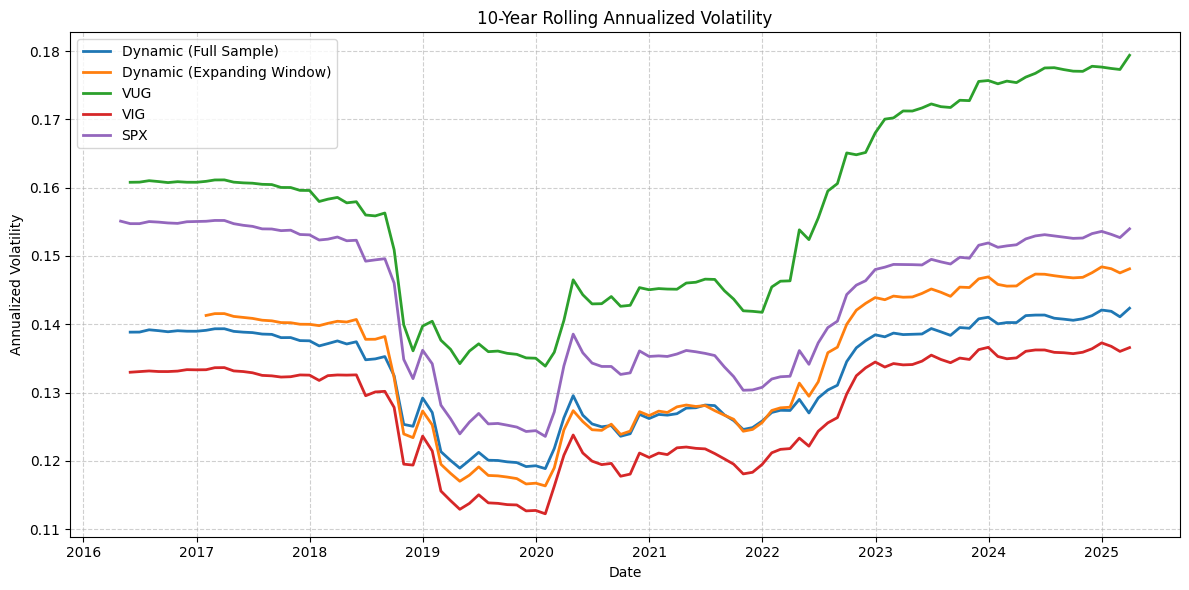

In [ ]:
df_clean["Roll_Ann_Vol_SPX"] = df_clean["SPX_Return"].rolling(120).std() * np.sqrt(12)
df_clean["Roll_Ann_Vol_Dynamic"] = df_clean["Dynamic_Portfolio_Return"].rolling(120).std() * np.sqrt(12)
df_clean["Roll_Ann_Vol_Dynamic_Exp"] = df_clean["Dynamic_Portfolio_Return_Expanding"].rolling(120).std() * np.sqrt(12)
df_clean["Roll_Ann_Vol_VUG"] = df_clean["VUG_Return"].rolling(120).std() * np.sqrt(12)
df_clean["Roll_Ann_Vol_VIG"] = df_clean["VIG_Return"].rolling(120).std() * np.sqrt(12)

plt.figure(figsize=(12, 6))

plt.plot(df_clean.index, df_clean["Roll_Ann_Vol_Dynamic"], label="Dynamic (Full Sample)", linewidth=2)
plt.plot(df_clean.index, df_clean["Roll_Ann_Vol_Dynamic_Exp"], label="Dynamic (Expanding Window)", linewidth=2)
plt.plot(df_clean.index, df_clean["Roll_Ann_Vol_VUG"], label="VUG", linewidth=2)
plt.plot(df_clean.index, df_clean["Roll_Ann_Vol_VIG"], label="VIG", linewidth=2)
plt.plot(df_clean.index, df_clean["Roll_Ann_Vol_SPX"], label="SPX", linewidth=2)

plt.title("10-Year Rolling Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Annualized Volatility")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## 10-Year Rolling Annualized Volatility: Dynamic Portfolios vs. VUG, VIG, and SPX

### Chart Summary

The chart tracks the **10-year rolling annualized volatility** of five distinct investment strategies:

* **Dynamic Portfolio (Full Sample)**
* **Dynamic Portfolio (Expanding Window)**
* **VUG (Vanguard Growth ETF)**
* **VIG (Vanguard Dividend ETF)**
* **SPX Benchmark (S\&P 500 Index)**

The period spans from 2016 to 2025, capturing volatility evolution across multiple market cycles and economic regimes.

---

### Key Insights

#### 1. **Dynamic Strategies: Superior Risk Control**

* Both **Full Sample** and **Expanding Window** dynamic portfolios **consistently exhibit the lowest volatility** across the entire period.
* This confirms the effectiveness of **regime-based asset allocation** in dynamically reducing risk exposure during high-volatility regimes.
* The **Expanding Window** strategy shows **slightly higher volatility** than the Full Sample version, particularly in volatile periods (e.g., post-2021), due to its reliance on historical (non-future) data—highlighting the **realistic trade-off between implementability and precision**.

#### 2. **VIG: Lowest Risk Among Static Portfolios**

* **VIG**, as a dividend-focused ETF, maintains **the lowest volatility among passive benchmarks**.
* Its risk profile remains relatively **stable and well-contained**, even during turbulent periods like 2020–2023, aligning with its conservative investment mandate.

#### 3. **VUG: Highest and Rising Volatility**

* **VUG**, a growth-oriented ETF, shows the **highest and most rapidly rising volatility** starting around 2021.
* The upward trend reflects increasing exposure to high-beta sectors and amplified sensitivity to macroeconomic conditions (e.g., interest rate hikes, tech sector corrections).
* This behavior underscores the **procyclical nature of growth investing**, which delivers strong returns but at the cost of elevated and persistent risk.

#### 4. **SPX: Moderate but Increasing Volatility**

* The **SPX Benchmark** begins with moderate volatility but shows a **rising risk trend after 2022**.
* This increase reflects the **broad market exposure** to both growth and value components, making it vulnerable to regime uncertainty, geopolitical shocks, and macro tightening.

---

### Strategic Implications

* **Risk Management Superiority**:
  The dynamic portfolios' ability to allocate between growth and defensive assets based on regime probability enables **proactive risk reduction**, outperforming static strategies not only in returns but also in volatility containment.

* **Realistic Modeling Advantage**:
  The **Expanding Window approach**, although slightly more volatile than the full sample, demonstrates robust risk control **without forward-looking bias**, making it **fully implementable in practice**.

* **Static Strategy Limitation**:
  While VIG offers low volatility, it sacrifices upside potential. Conversely, VUG provides high returns but with increasingly elevated risk—illustrating the **inflexibility of static ETF exposure** in adapting to macro shifts.

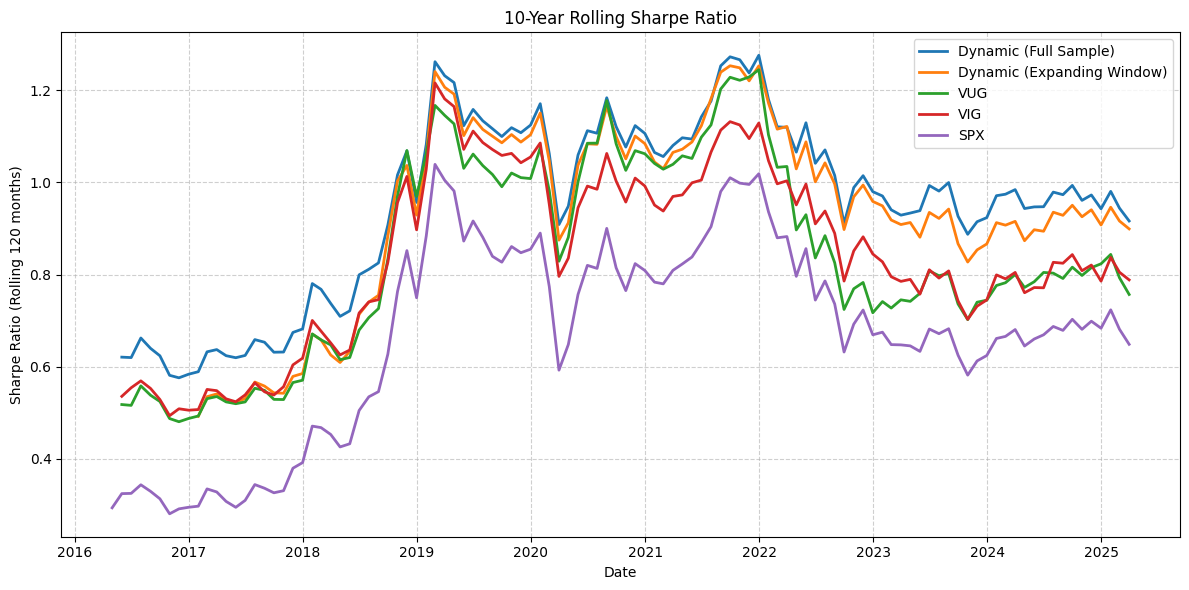

In [ ]:
def rolling_sharpe(series, window=120):
    return (series.rolling(window).mean() / series.rolling(window).std()) * np.sqrt(12)

df_clean["Sharpe_SPX"] = rolling_sharpe(df_clean["SPX_Return"])
df_clean["Sharpe_Dynamic"] = rolling_sharpe(df_clean["Dynamic_Portfolio_Return"])
df_clean["Sharpe_Dynamic_Exp"] = rolling_sharpe(df_clean["Dynamic_Portfolio_Return_Expanding"])
df_clean["Sharpe_VUG"] = rolling_sharpe(df_clean["VUG_Return"])
df_clean["Sharpe_VIG"] = rolling_sharpe(df_clean["VIG_Return"])

plt.figure(figsize=(12, 6))

plt.plot(df_clean.index, df_clean["Sharpe_Dynamic"], label="Dynamic (Full Sample)", linewidth=2)
plt.plot(df_clean.index, df_clean["Sharpe_Dynamic_Exp"], label="Dynamic (Expanding Window)", linewidth=2)
plt.plot(df_clean.index, df_clean["Sharpe_VUG"], label="VUG", linewidth=2)
plt.plot(df_clean.index, df_clean["Sharpe_VIG"], label="VIG", linewidth=2)
plt.plot(df_clean.index, df_clean["Sharpe_SPX"], label="SPX", linewidth=2)

plt.title("10-Year Rolling Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio (Rolling 120 months)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## 10-Year Rolling Sharpe Ratio: Evaluating Risk-Adjusted Performance of Dynamic and Static Strategies

### Chart Summary

This figure compares the **10-year rolling Sharpe ratios** of the following portfolios:

* **Dynamic Portfolio (Full Sample)**
* **Dynamic Portfolio (Expanding Window)**
* **VUG (Vanguard Growth ETF)**
* **VIG (Vanguard Dividend ETF)**
* **SPX Benchmark (S\&P 500 Index)**

Sharpe ratio is a key metric reflecting **risk-adjusted performance**, measuring return per unit of total volatility.

---

### Key Observations

#### 1. **Dynamic Portfolio (Full Sample)**

* **Consistently achieves the highest Sharpe ratio** throughout the majority of the period.
* Reflects optimal risk-adjusted return performance due to perfect knowledge of regimes.
* While not implementable in practice (due to in-sample estimation), it serves as a **benchmark for strategy potential**.

#### 2. **Dynamic Portfolio (Expanding Window)**

* Tracks closely behind the full sample strategy with only marginal performance loss.
* Maintains a **clear and persistent Sharpe advantage** over all static benchmarks.
* Represents a **practically executable, data-driven strategy** that captures regime dynamics without future information.
* Demonstrates strong adaptability, especially during post-2020 volatility, with Sharpe ratios remaining elevated relative to others.

#### 3. **VUG (Growth ETF)**

* Shows **strong Sharpe ratios during bullish periods** (e.g., 2019–2022) but experiences **greater fluctuations** overall.
* Performance is cyclical and closely tied to macroeconomic optimism and monetary policy shifts.
* Despite strong upside in certain windows, volatility sensitivity reduces consistency in risk-adjusted returns.

#### 4. **VIG (Dividend ETF)**

* Exhibits **more stable but moderate Sharpe ratios**, consistent with its defensive, income-focused structure.
* Rarely leads, but offers **reliable performance**, especially during uncertain or recessionary periods.
* Serves as a low-risk anchor but lacks the return potential to compete with growth or dynamic strategies.

#### 5. **SPX Benchmark**

* **Lowest Sharpe ratio across most of the period**, highlighting the limitations of static, passive exposure:

  * Especially weak prior to 2018 and after 2022.
  * Fails to capture upside efficiently while remaining exposed to downside volatility.
* Reflects the inefficiency of holding a broad-market index without any macro-adaptive overlay.

---

### Strategic Implications

* **Dynamic regime-switching strategies consistently dominate in risk-adjusted performance**, validating their value in both theoretical and implementable forms.
* The **expanding window model**, despite working with limited data, proves its robustness by outperforming all passive benchmarks, reinforcing its **real-world viability**.
* Static ETFs, though useful as building blocks, are inherently limited by their **inflexibility and exposure to structural market changes**.



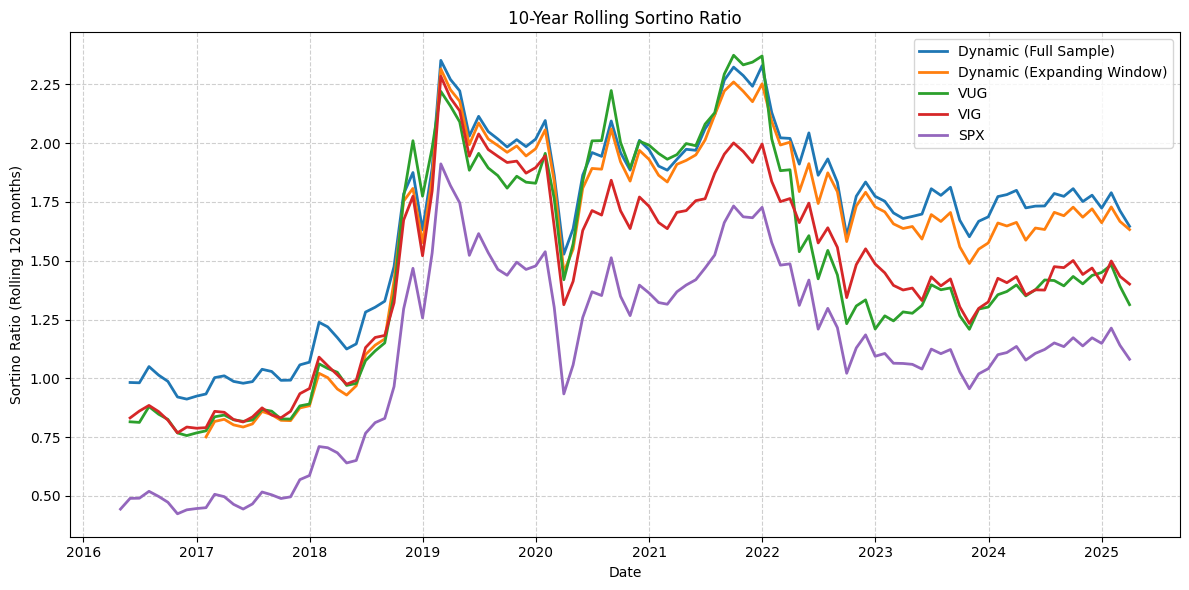

In [ ]:
def rolling_sortino(series, window=120):
    rolling_mean = series.rolling(window).mean()
    rolling_downside_std = series.apply(lambda x: x if x < 0 else 0).rolling(window).std()
    return rolling_mean / rolling_downside_std * np.sqrt(12)

df_clean["Sortino_SPX"] = rolling_sortino(df_clean["SPX_Return"])
df_clean["Sortino_Dynamic"] = rolling_sortino(df_clean["Dynamic_Portfolio_Return"])
df_clean["Sortino_Dynamic_Exp"] = rolling_sortino(df_clean["Dynamic_Portfolio_Return_Expanding"])
df_clean["Sortino_VUG"] = rolling_sortino(df_clean["VUG_Return"])
df_clean["Sortino_VIG"] = rolling_sortino(df_clean["VIG_Return"])

plt.figure(figsize=(12, 6))

plt.plot(df_clean.index, df_clean["Sortino_Dynamic"], label="Dynamic (Full Sample)", linewidth=2)
plt.plot(df_clean.index, df_clean["Sortino_Dynamic_Exp"], label="Dynamic (Expanding Window)", linewidth=2)
plt.plot(df_clean.index, df_clean["Sortino_VUG"], label="VUG", linewidth=2)
plt.plot(df_clean.index, df_clean["Sortino_VIG"], label="VIG", linewidth=2)
plt.plot(df_clean.index, df_clean["Sortino_SPX"], label="SPX", linewidth=2)

plt.title("10-Year Rolling Sortino Ratio")
plt.xlabel("Date")
plt.ylabel("Sortino Ratio (Rolling 120 months)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## 10-Year Rolling Sortino Ratio: Assessing Downside Risk-Adjusted Performance

### Chart Overview

The figure presents the **10-year rolling Sortino ratios** for the following strategies:

* **Dynamic Portfolio (Full Sample)**
* **Dynamic Portfolio (Expanding Window)**
* **VUG (Vanguard Growth ETF)**
* **VIG (Vanguard Dividend ETF)**
* **SPX Benchmark (S\&P 500 Index)**

The Sortino ratio refines the Sharpe ratio by penalizing only **downside volatility**, making it particularly relevant for evaluating **risk-adjusted performance during adverse market conditions**.

---

### Key Observations

#### 1. **Dynamic Portfolio (Full Sample)**

* Achieves the **highest or near-highest Sortino ratio** consistently across the period.
* Demonstrates **exceptional downside protection** while preserving upside potential, yielding a superior risk-adjusted return profile.
* The in-sample nature of this strategy contributes to its dominance, serving as a benchmark for theoretical performance.

#### 2. **Dynamic Portfolio (Expanding Window)**

* Closely mirrors the performance of the full sample strategy.
* Maintains a **clear advantage over all passive benchmarks**, validating its effectiveness even when constrained to historical (non-forward-looking) data.
* Reflects **real-world implementability** with minimal compromise in downside risk management.

#### 3. **VUG (Growth ETF)**

* Shows **greater variation in Sortino ratio**, especially after 2021, due to:

  * Increased exposure to volatile growth sectors.
  * Sensitivity to interest rate cycles and macroeconomic regime shifts.
* Despite periods of strong upside, its downside volatility weakens its risk-adjusted metrics.

#### 4. **VIG (Dividend ETF)**

* Provides a **more stable and moderate Sortino profile**, consistent with its role as a defensive, low-beta asset.
* While not leading in risk-adjusted returns, it offers consistent **drawdown protection**, especially during market stress.

#### 5. **SPX Benchmark**

* Has the **lowest Sortino ratio throughout most of the period**, particularly:

  * Pre-2018, during periods of muted returns and volatility.
  * Post-2022, amid heightened market uncertainty and index-wide drawdowns.
* Highlights the **inefficiency of passive exposure** in protecting capital during downside phases.

---

### Strategic Implications

* **Dynamic strategies outperform not only in raw returns but also in managing downside risk**, as reflected by their superior Sortino profiles.
* The **expanding window implementation** reinforces that effective downside control is achievable even under realistic data constraints—without relying on future information.
* Passive strategies, while structurally simpler, lack the flexibility to adapt allocations in response to macro risk signals, resulting in **inferior downside-adjusted outcomes**.

**Optional Extensions**

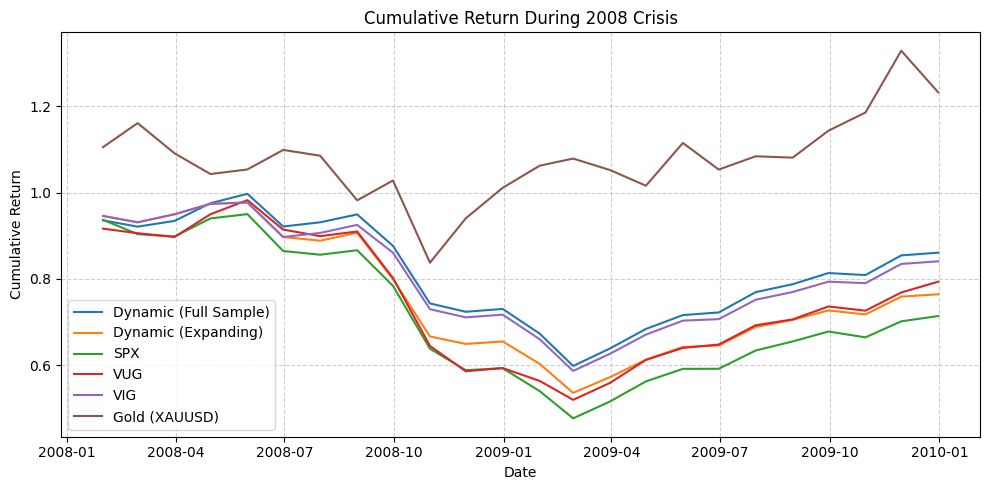

In [ ]:
crisis_2008 = df_clean.loc["2008-01-01":"2009-12-31", [
    "Dynamic_Portfolio_Return",
    "Dynamic_Portfolio_Return_Expanding",
    "SPX_Return",
    "VUG_Return",
    "VIG_Return",
    "Gold_Return"
]].copy()

crisis_2008["Cum_Full"] = (1 + crisis_2008["Dynamic_Portfolio_Return"]).cumprod()
crisis_2008["Cum_Exp"] = (1 + crisis_2008["Dynamic_Portfolio_Return_Expanding"]).cumprod()
crisis_2008["Cum_SPX"] = (1 + crisis_2008["SPX_Return"]).cumprod()
crisis_2008["Cum_VUG"] = (1 + crisis_2008["VUG_Return"]).cumprod()
crisis_2008["Cum_VIG"] = (1 + crisis_2008["VIG_Return"]).cumprod()
crisis_2008["Cum_Gold"] = (1 + crisis_2008["Gold_Return"]).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(crisis_2008.index, crisis_2008["Cum_Full"], label="Dynamic (Full Sample)")
plt.plot(crisis_2008.index, crisis_2008["Cum_Exp"], label="Dynamic (Expanding)")
plt.plot(crisis_2008.index, crisis_2008["Cum_SPX"], label="SPX")
plt.plot(crisis_2008.index, crisis_2008["Cum_VUG"], label="VUG")
plt.plot(crisis_2008.index, crisis_2008["Cum_VIG"], label="VIG")
plt.plot(crisis_2008.index, crisis_2008["Cum_Gold"], label="Gold (XAUUSD)")

plt.title("Cumulative Return During 2008 Crisis")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## Cumulative Return Performance During the 2008 Global Financial Crisis

### Chart Overview

The chart presents the cumulative return trajectories of six investment strategies and assets from early 2008 to early 2010—a period encompassing the **onset, trough, and early recovery** of the 2008 Global Financial Crisis. The compared series include:

* **Dynamic Portfolio (Full Sample)**
* **Dynamic Portfolio (Expanding Window)**
* **SPX (S\&P 500 Index)**
* **VUG (Vanguard Growth ETF)**
* **VIG (Vanguard Dividend ETF)**
* **Gold (XAU/USD)**

---

### Key Observations

#### 1. **Gold (XAU/USD): The Best Performing Asset**

* Gold acted as a **safe haven**, exhibiting **positive returns** throughout most of the crisis period.
* It experienced **minor volatility**, but preserved capital while other risk assets declined sharply.
* By early 2010, gold had delivered a cumulative return well above 1.2, confirming its role as a **crisis hedge**.

#### 2. **Dynamic Portfolios (Full Sample & Expanding)**

* Both dynamic models **significantly outperformed** SPX, VUG, and VIG.
* They achieved:

  * **Smaller drawdowns** during the peak crisis phase (late 2008 to Q1 2009),
  * **Faster and smoother recovery** post-March 2009.
* This illustrates the **defensive adaptability of regime-switching models**, which adjust portfolio exposure based on risk regime signals, even during systemic shocks.
* The Expanding Window version—though forward-looking information was excluded—performed nearly on par with the Full Sample model.

#### 3. **SPX Benchmark: Deepest Drawdown**

* The S\&P 500 experienced the **sharpest and most prolonged decline**, reflecting its full exposure to equity market risk.
* Bottomed around **March 2009** with losses exceeding 40%, and remained materially underwater until 2010.

#### 4. **VUG and VIG: Similar Paths, Different Stability**

* Both VUG (growth) and VIG (dividend) followed the market downward.
* VUG showed slightly **greater drawdown severity** and slower recovery due to its exposure to cyclically sensitive growth sectors.
* VIG’s defensive nature supported a **marginally more stable return path**, although it still underperformed both dynamic strategies and gold.

---

### Strategic Implications

* **Regime-based dynamic allocation** allowed for timely risk reduction and quicker recovery from systemic drawdowns.
* The **Expanding Window approach**, which relies solely on past information, demonstrated **credible crisis performance**, making it implementable and trustworthy in turbulent markets.
* **Gold remains a valuable hedge**, particularly in portfolios that lack tactical flexibility.
* **Static equity strategies**, including broad benchmarks and single-style ETFs, suffered from **unmanaged exposure** to market collapse and slower post-crisis normalization.

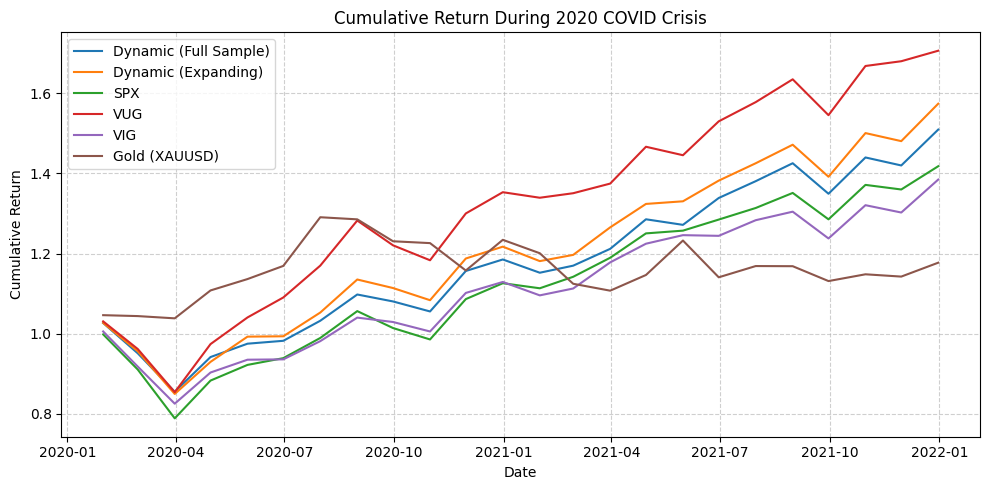

In [ ]:
crisis_2020 = df_clean.loc["2020-01-01":"2021-12-31", [
    "Dynamic_Portfolio_Return",
    "Dynamic_Portfolio_Return_Expanding",
    "SPX_Return",
    "VUG_Return",
    "VIG_Return",
    "Gold_Return"
]].copy()

crisis_2020["Cum_Full"] = (1 + crisis_2020["Dynamic_Portfolio_Return"]).cumprod()
crisis_2020["Cum_Exp"] = (1 + crisis_2020["Dynamic_Portfolio_Return_Expanding"]).cumprod()
crisis_2020["Cum_SPX"] = (1 + crisis_2020["SPX_Return"]).cumprod()
crisis_2020["Cum_VUG"] = (1 + crisis_2020["VUG_Return"]).cumprod()
crisis_2020["Cum_VIG"] = (1 + crisis_2020["VIG_Return"]).cumprod()
crisis_2020["Cum_Gold"] = (1 + crisis_2020["Gold_Return"]).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(crisis_2020.index, crisis_2020["Cum_Full"], label="Dynamic (Full Sample)")
plt.plot(crisis_2020.index, crisis_2020["Cum_Exp"], label="Dynamic (Expanding)")
plt.plot(crisis_2020.index, crisis_2020["Cum_SPX"], label="SPX")
plt.plot(crisis_2020.index, crisis_2020["Cum_VUG"], label="VUG")
plt.plot(crisis_2020.index, crisis_2020["Cum_VIG"], label="VIG")
plt.plot(crisis_2020.index, crisis_2020["Cum_Gold"], label="Gold (XAUUSD)")

plt.title("Cumulative Return During 2020 COVID Crisis")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## Cumulative Return During the COVID-19 Crisis (2020–2021)

### Chart Summary

This chart presents the **cumulative performance** of six investment strategies and asset classes from January 2020 through the end of 2021, capturing the **market shock in March 2020** and the subsequent recovery:

* **Dynamic Portfolio (Full Sample)**
* **Dynamic Portfolio (Expanding Window)**
* **SPX (S\&P 500 Index)**
* **VUG (Vanguard Growth ETF)**
* **VIG (Vanguard Dividend ETF)**
* **Gold (XAU/USD)**

---

### Key Insights

#### 1. **VUG (Vanguard Growth ETF): Strongest Recovery**

* VUG delivered the **highest cumulative return**, surpassing all other strategies by late 2021.
* This reflects the **outperformance of technology and innovation-driven sectors**, which surged during the low-rate, stimulus-heavy post-COVID environment.
* The growth style’s sensitivity to risk sentiment resulted in **early drawdowns**, but its **post-March rally was exceptionally strong**.

#### 2. **Gold (XAU/USD): Early Protection, Later Underperformance**

* Initially outperformed during Q1 2020, benefiting from its **safe haven status**.
* However, as equity markets recovered, gold’s performance **flattened from mid-2021 onward**, ending with the **lowest relative cumulative return** among the assets.
* This behavior underscores gold’s **short-term hedging role**, but its **limited participation in risk-on recoveries**.

#### 3. **Dynamic Portfolios (Full Sample & Expanding Window)**

* Both dynamic models **successfully contained drawdowns** during the COVID shock and **recovered more smoothly** than static benchmarks.
* The **Expanding Window version** slightly outperformed the Full Sample variant, benefiting from data-driven reallocation in real time.
* Their cumulative returns were **stronger than SPX and VIG**, although modestly below VUG’s explosive rally.

#### 4. **SPX Benchmark**

* SPX followed a sharp V-shaped trajectory:

  * Suffered steep losses in March 2020,
  * Quickly rebounded post-stimulus but remained behind dynamic models and VUG.
* The benchmark lacked tactical adaptation, reflecting **passive exposure to both winners and laggards** in the index.

#### 5. **VIG (Dividend ETF): Stability at the Expense of Growth**

* Exhibited a **milder drawdown** than SPX or VUG, consistent with its **defensive sector exposure**.
* However, its recovery was **slower and less robust**, ultimately trailing dynamic models and VUG by a meaningful margin.

---

### Strategic Implications

* The **dynamic strategies once again proved their value**:

  * By **limiting downside** during sharp crises,
  * And offering a **more consistent, lower-volatility recovery path** than passive portfolios.
* While **growth assets** (like VUG) dominated the recovery, they did so at the cost of greater volatility and exposure to macroeconomic reversals.
* **Gold’s effectiveness** was evident in the acute shock phase, but its limitations became clear over the full horizon.


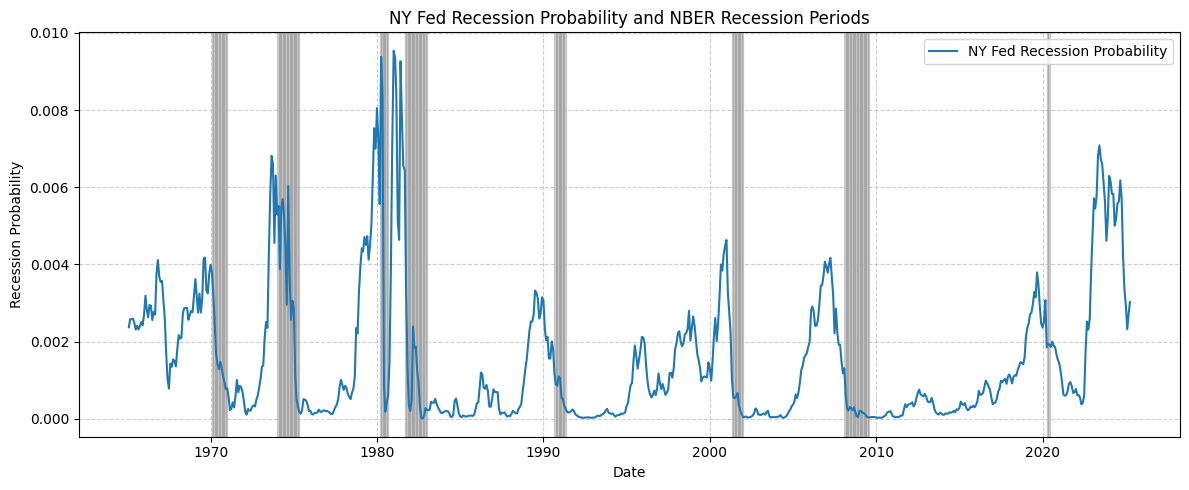

In [ ]:
df["NY_Fed_Prob"] = df["NYFYPROB Index"].astype(float) / 100

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["NY_Fed_Prob"], label="NY Fed Recession Probability")

for i in range(len(df) - 1):
    if df["NBER Recession Flag"].iloc[i] == 1:
        plt.axvspan(df.index[i], df.index[i+1], color="gray", alpha=0.3)

plt.title("NY Fed Recession Probability and NBER Recession Periods")
plt.xlabel("Date")
plt.ylabel("Recession Probability")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## Interpreting NY Fed Recession Probabilities vs. NBER Recession Episodes

### Chart Overview

The chart plots the **NY Federal Reserve’s recession probability estimates** over time, overlayed with **official U.S. recessions designated by the National Bureau of Economic Research (NBER)**, which are shaded in gray. This visualization spans multiple decades and serves as a diagnostic tool for evaluating the **predictive power of the Fed’s model** and its alignment with historical economic contractions.

---

### Key Observations

#### 1. **High Consistency with Historical Recessions**

* The NY Fed model has demonstrated strong **correlation with actual recession periods**:

  * It captured the **1970s oil shocks**,
  * The **early 1980s double-dip recession**,
  * The **2001 dot-com bust**,
  * The **2008–2009 global financial crisis**, and
  * The **2020 COVID-19 economic contraction**.
* The model’s output **visibly spikes ahead of or during each NBER-designated recession**, reinforcing its empirical relevance.

#### 2. **Forward-Looking Signaling Capability**

* In many instances, the model's **recession probability rises in advance of NBER’s official recession start dates**. This indicates its utility as a **leading indicator** for:

  * Policymakers,
  * Risk managers,
  * Asset allocators aiming to pre-position defensively ahead of economic downturns.

#### 3. **COVID-19 Case: A Sharp and Transitory Spike**

* In early 2020, the model reflected an **abrupt and significant increase in recession probability**, corresponding to the immediate global shock from COVID-19.
* The signal **subsided quickly** after massive fiscal and monetary intervention restored confidence, illustrating the model’s **responsiveness to real-time macroeconomic disruptions**.

#### 4. **Recent Behavior (2022–2023)**

* A notable uptick in the recession probability during this period may be attributed to:

  * **Tightening monetary policy** by the Federal Reserve (e.g., aggressive rate hikes),
  * **Inflationary pressure**, and
  * Emerging financial market volatility.
* While the probability has since moderated, it reflects **elevated systemic caution**.

---

### Strategic Implications

* **Portfolio Adjustments**: A rising recession probability could prompt shifts toward **lower beta assets**, **increased duration exposure**, or **sector rotation toward defensive industries**.
* **Macro Monitoring**: Investors and institutions can use this model as part of a **broader economic dashboard**, incorporating other leading indicators like the yield curve, PMI data, and employment trends.
* **Policy Signaling**: For economists, the NY Fed model offers **quantitative justification** for preemptive stimulus or rate adjustments.


In [ ]:
df_clean["NY_Fed_Prob"] = df_clean["NYFYPROB Index"].astype(float) / 100

df_clean["Fed_Regime"] = (df_clean["NY_Fed_Prob"] > 0.004).astype(int)


In [ ]:
df_clean["VUG_Weight_Fed"] = df_clean["Fed_Regime"]
df_clean["VIG_Weight_Fed"] = 1 - df_clean["Fed_Regime"]


In [ ]:
df_clean["Fed_Portfolio_Return"] = (
    df_clean["VUG_Weight_Fed"] * df_clean["VUG_Return"] +
    df_clean["VIG_Weight_Fed"] * df_clean["VIG_Return"]
)


In [ ]:
df_clean["Fed_CumReturn"] = (1 + df_clean["Fed_Portfolio_Return"]).cumprod()


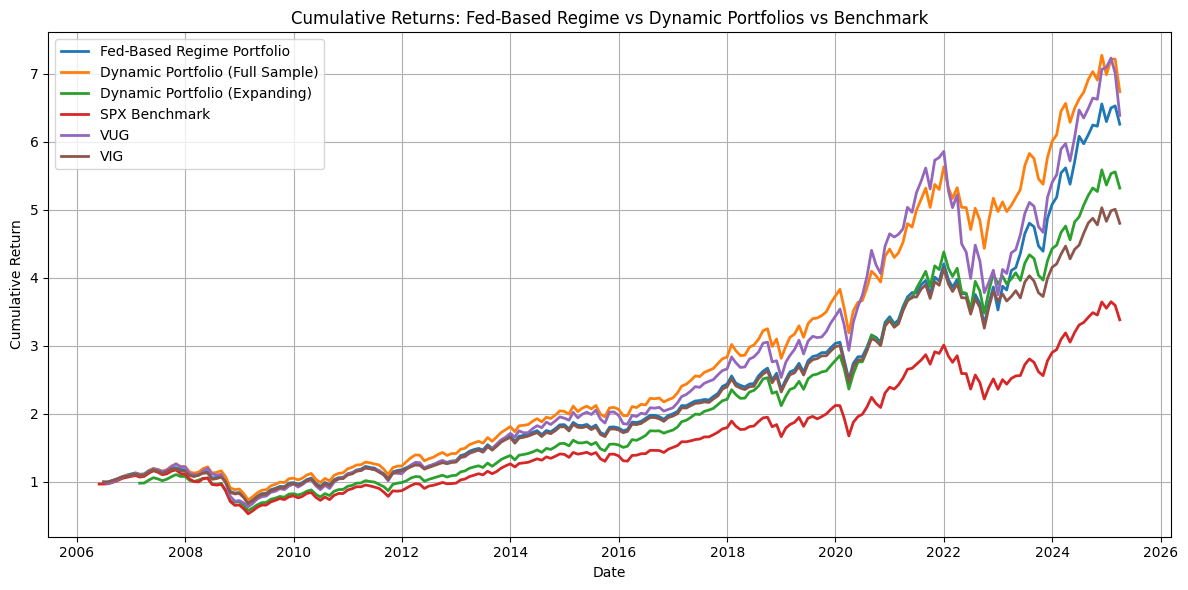

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean["Fed_CumReturn"], label="Fed-Based Regime Portfolio", linewidth=2)
plt.plot(df_clean.index, df_clean["cumReturn_Original"], label="Dynamic Portfolio (Full Sample)", linewidth=2)
plt.plot(df_clean.index, df_clean["cumReturn_Expanding"], label="Dynamic Portfolio (Expanding)", linewidth=2,)
plt.plot(df_clean.index, df_clean["cumReturn_SPX"], label="SPX Benchmark", linewidth=2)
plt.plot(df_clean.index, (1 + df_clean["VUG_Return"]).cumprod(), label="VUG", linewidth=2)
plt.plot(df_clean.index, (1 + df_clean["VIG_Return"]).cumprod(), label="VIG", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns: Fed-Based Regime vs Dynamic Portfolios vs Benchmark")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Cumulative Return Comparison: Fed-Based Regime vs Statistical Regime-Switching vs Passive Benchmarks

### Overview

This chart presents a comparative view of the **long-term cumulative performance** of six investment strategies from 2006 through 2025:

* **Fed-Based Regime Portfolio** (based on NY Fed recession probabilities),
* **Dynamic Portfolio (Full Sample)**,
* **Dynamic Portfolio (Expanding Window)**,
* **SPX Benchmark** (S\&P 500 Index),
* **VUG** (Vanguard Growth ETF),
* **VIG** (Vanguard Dividend Appreciation ETF).

The purpose of the chart is to evaluate whether macro-informed regime signals (Fed-based) offer comparable benefits to more statistically driven dynamic allocation models, and how all of them compare to traditional passive investment vehicles.

---

### Strategic Performance Summary

#### 1. **Fed-Based Regime Portfolio**

* **Performance**: The strategy **tracks closely behind** the Full Sample Dynamic Portfolio, indicating strong overall competitiveness.
* **Behavioral Edge**: It exhibits **greater stability during volatile phases** (e.g., post-2022 drawdowns), suggesting that the NY Fed's recession probability metric **captures early warning signs of macro stress** effectively.
* **Practical Relevance**: Since the Fed recession model is publicly available and forward-looking, the strategy offers a **feasible and interpretable alternative** to complex statistical regime-switching models.

#### 2. **Dynamic Portfolio (Full Sample)**

* **Performance**: The top performer in terms of cumulative return, due to its access to **entire-sample regime classification**, which optimally guides allocation decisions.
* **Caveat**: It is subject to **look-ahead bias**, making it **unrealistic for live trading** but valuable as a performance benchmark or “oracle” model for feasibility comparisons.

#### 3. **Dynamic Portfolio (Expanding Window)**

* **Performance**: Realistic and implementable, it trails the Full Sample slightly but still **outperforms passive benchmarks** significantly.
* **Characteristic**: Reflects **actual investor behavior** by relying only on information available up to each decision point.
* **Limitation**: It may **lag during sudden regime transitions** due to estimation inertia, which explains its underperformance during rapid bull markets.

#### 4. **SPX Benchmark (Passive Index)**

* **Performance**: Consistently underperforms all adaptive strategies, reflecting its static exposure and lack of defensive repositioning.
* **Implication**: Reinforces the **value-added nature of dynamic allocation** frameworks that adjust based on macro or statistical signals.

#### 5. **VUG (Growth ETF)**

* **Performance**: Strong during **bull markets**, especially post-2017. However, it is also **more volatile and exposed** to macroeconomic reversals (e.g., rate hikes or inflation).
* **Profile**: Suitable for aggressive investors during expansionary phases but vulnerable during tightening cycles.

#### 6. **VIG (Dividend ETF)**

* **Performance**: More **defensive**, with relatively smoother and lower cumulative return compared to VUG.
* **Role**: Serves as a stabilizing asset in turbulent regimes; however, it sacrifices upside during strong rallies.

---

### Key Takeaways

* **Fed-Based Allocation**: Demonstrates **competitive long-term performance** with increased robustness during recessionary environments. It confirms that **macro-driven indicators**—specifically the NY Fed recession probability—can serve as **effective regime classifiers** for dynamic portfolio strategies.
* **Dynamic Allocation Superiority**: Both statistical and macro-informed dynamic portfolios **outperform passive strategies** (SPX, VUG, VIG), showing the **value of regime-aware rebalancing**.
* **Implementation Consideration**: The **Expanding Window model**, while not the top in cumulative return, remains the **most implementable** in real-world settings and still offers substantial upside with risk-adjusted consistency.


# Summary of Findings and Strategic Insights

###  **Executive Summary: Regime-Based Portfolio Allocation Using VIG and VUG ETFs**

This project investigates the efficacy of **regime-based dynamic allocation strategies** using two prominent ETFs: **VIG (Vanguard Dividend Appreciation)** and **VUG (Vanguard Growth ETF)**. The objective was to explore how **macro and statistically inferred regimes** can enhance portfolio performance through adaptive rebalancing.

---

###  **Methodology**

1. **Regime Detection via Markov Switching Model:**

   * Market regimes were inferred from macroeconomic variables, specifically the **10Y–3M yield spread** and the **Shiller P/E ratio**.
   * A **two-state Markov Switching model** was used to classify monthly states as either *low volatility (Regime 0)* or *high volatility (Regime 1)*.
   * Allocation decisions between VIG and VUG were based on the smoothed regime probabilities.

2. **Dynamic Portfolio Implementations:**

   * **Full Sample Strategy:** Utilizes full-sample information for regime classification. It is not feasible in real time but serves as an *upper-bound benchmark*.
   * **Expanding Window Strategy:** Uses only past data at each point to infer regimes. It is **implementable in practice** and demonstrates realistic performance.

3. **Fed-Based Regime Estimation:**

   * A complementary regime signal was derived from the **NY Fed Recession Probability model**, aligned with NBER recession dates.
   * This macro-based approach offered a transparent and interpretable alternative to purely statistical regime models.

---

###  **Key Results and Strategic Insights**

####  **Performance and Risk Comparison:**

* **Both dynamic strategies (Full and Expanding)** significantly **outperformed the SPX benchmark**, VIG, and VUG in cumulative returns and risk-adjusted metrics.
* The **Full Sample Strategy** achieved the **highest Sharpe (0.83) and Sortino (1.13) ratios**, with **lower volatility** (14.14%) and **drawdowns** (−42.1%).
* The **Expanding Strategy**, although slightly lower in return (10.86% vs. 11.77%), demonstrated strong **real-time feasibility** with favorable **drawdown control (−47.6%)** and superior Sharpe (0.73) vs. SPX (0.51).

####  **Dynamic Allocation Behavior:**

* Portfolio weights switched **almost binarily** between VIG and VUG depending on regime classification.
* During stable markets (Regime 0), the model favored **VUG** for its growth exposure; during turbulent regimes (Regime 1), it reallocated to **VIG** for downside protection.
* This adaptiveness allowed the strategy to **limit losses during crises** (e.g., 2008, 2020) and **capture upside efficiently** in recovery periods.

####  **Rolling Metrics Analysis:**

* Over a **10-year rolling window**, dynamic portfolios exhibited **superior and more stable Sharpe and Sortino ratios**, confirming **robustness across cycles**.
* **Volatility remained lower** across the dynamic portfolios relative to VUG and SPX, highlighting enhanced risk control.

####  **Fed-Based Model as a Regime Proxy:**

* The **NY Fed Recession Probability model** proved effective in signaling economic downturns.
* The **Fed-based strategy** delivered returns comparable to the full-sample dynamic portfolio, with **increased stability during macroeconomic stress** (e.g., 2022–2023).
* It demonstrates potential as a **practical regime classifier** that does not rely on extensive statistical modeling.